# Q2

In [8]:
# Load CSV
import numpy
filename = 'naive_bayes_binary.csv'
raw_data = open(filename, 'rt')
data = numpy.loadtxt(raw_data, delimiter=',', skiprows=1)
print(data.shape)


(5000, 11)


In [9]:
import numpy as np
# store the feature matrix (X) and response vector (y)
X = np.array(data)
y = data[:,10]
y = np.array(y)


In [10]:
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


In [11]:
 # training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 248,    0,    0],
       [   0,  259,    0],
       [   0,    0, 1993]])

# Q3

In [13]:
import pandas as pd
df = pd.read_csv('student-mat.csv')

pd.options.display.max_rows = 9999
print(df) 

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [16]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data['school'] = number.fit_transform(data.school)
    data['sex'] = number.fit_transform(data.sex)
    data['address'] = number.fit_transform(data.address)
    data['famsize'] = number.fit_transform(data.famsize)
    data['Pstatus'] = number.fit_transform(data.Pstatus)
    data['Mjob'] = number.fit_transform(data.Mjob)
    data['Fjob'] = number.fit_transform(data.Fjob)
    data['reason'] = number.fit_transform(data.reason)
    data['guardian'] = number.fit_transform(data.guardian)
    data['schoolsup'] = number.fit_transform(data.schoolsup)
    data['famsup'] = number.fit_transform(data.famsup)
    data['paid'] = number.fit_transform(data.paid)
    data['activities'] = number.fit_transform(data.activities)
    data['nursery'] = number.fit_transform(data.nursery)
    data['higher'] = number.fit_transform(data.higher)
    data['internet'] = number.fit_transform(data.internet)
    data['romantic'] = number.fit_transform(data.romantic)
    data=data.fillna(-999)
    return data

df = convert(df)

In [17]:
classification_column = np.where(df["G3"] > 10, True, False)


classified_col = []
for i in classification_column:
  if i==True:
    i=1 # Greater
  else:
    i=0 # LessOrEqual
  classified_col.append(i)

classified_col = np.array(classified_col)

print(classified_col)

[0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1
 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [18]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

feature_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values
y = classified_col

In [19]:
# split the dataset into training and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [20]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
#Fit the model in the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [22]:
#prediction
y_pred = classifier.predict(X_test)

#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))


Accuracy Score: 0.5353535353535354


In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 28],
       [18, 30]])

In [24]:
!wget https://raw.githubusercontent.com/boazbk/tcscode/master/Utilities.ipynb
!pip install schemdraw
!pip install pydotplus
!apt install -y graphviz
!pip install graphviz



--2022-04-02 10:30:48--  https://raw.githubusercontent.com/boazbk/tcscode/master/Utilities.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 382497 (374K) [text/plain]
Saving to: ‘Utilities.ipynb’

Utilities.ipynb     100%[===================>] 373.53K  --.-KB/s    in 0.005s  

2022-04-02 10:30:48 (79.0 MB/s) - ‘Utilities.ipynb’ saved [382497/382497]

     |████████████████████████████████| 105 kB 23.6 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


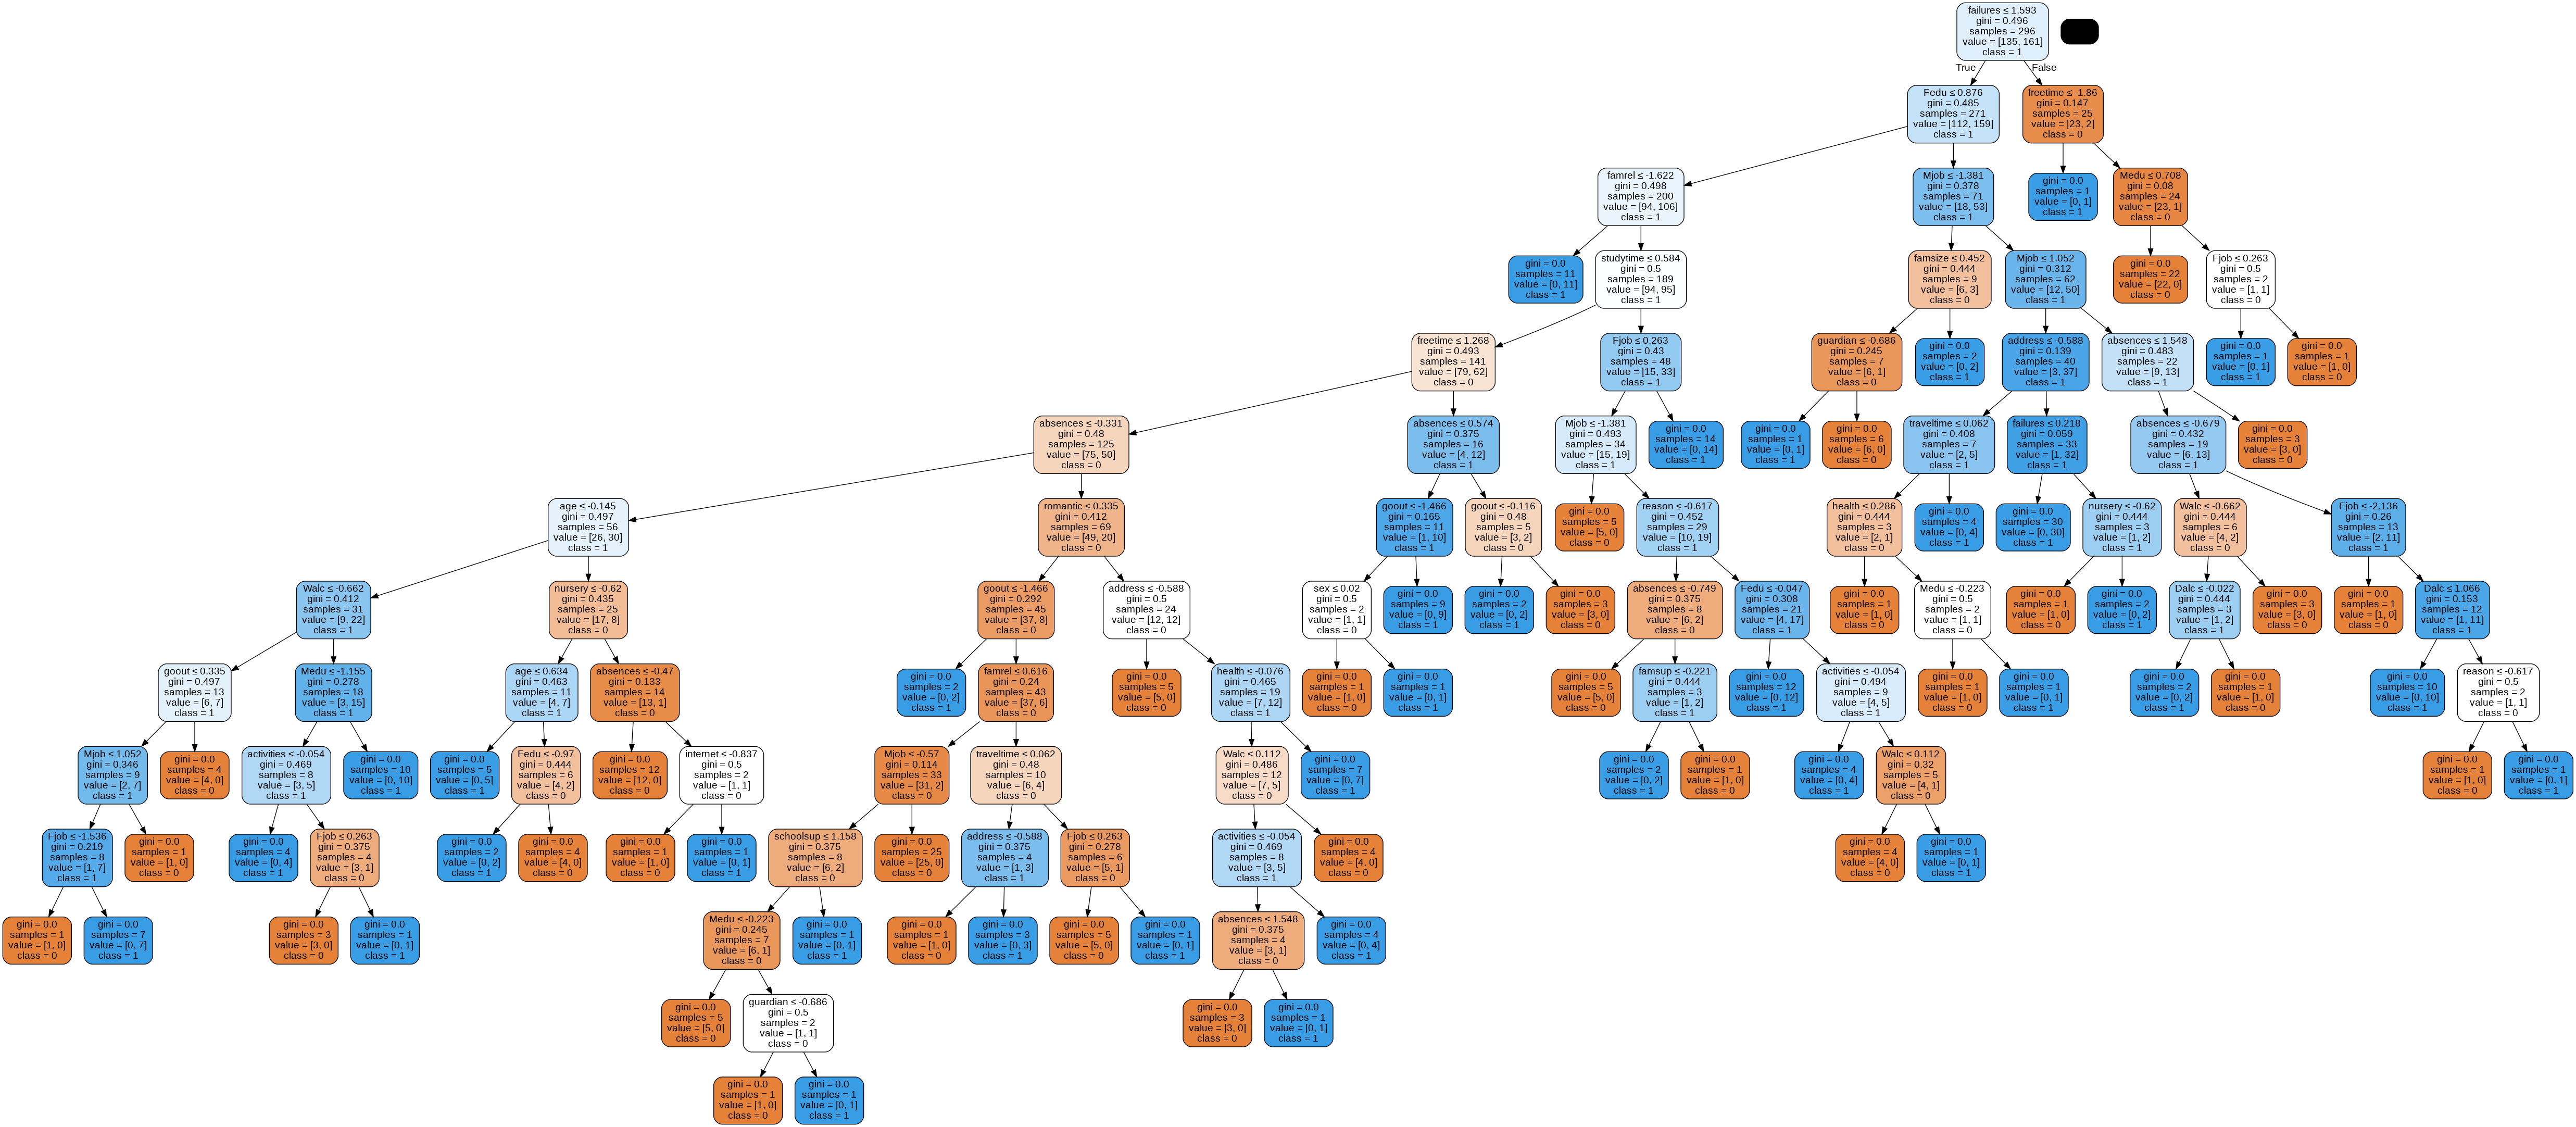

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [26]:
#Pruning

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5656565656565656


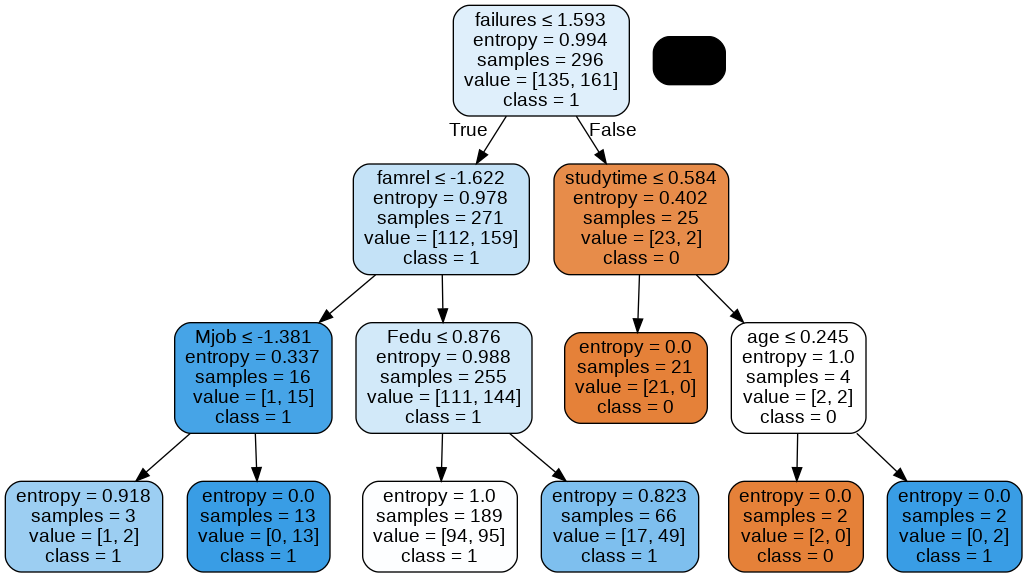

In [27]:
#Visualizing the pruned tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Part b

In [28]:
# Error rate on Training Data on Pruned tree

alphas = np.logspace(-5, 1, 60)
enet = classifier
train_errors = list()
for alpha in alphas:
    enet.fit(X_train, y_train)
    train_errors = enet.score(X_train, y_train)

print(train_errors)


0.6216216216216216


In [29]:
# Generalization Error on Pruned Tree

y_pred = classifier.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.5656565656565656


## Part c

Feature 0: 0.000000
Feature 1: 0.136588
Feature 2: 0.000000
Feature 3: 0.083319
Feature 4: 0.189751
Feature 5: 0.290793
Feature 6: 0.084823
Feature 7: 0.138756
Feature 8: 0.120691
Feature 9: 0.062437
Feature 10: 0.000000
Feature 11: 0.241485
Feature 12: 0.000000
Feature 13: 0.081932
Feature 14: 0.126095
Feature 15: 0.026816
Feature 16: 0.191458
Feature 17: 0.059123
Feature 18: 0.138335
Feature 19: 0.233915
Feature 20: 0.315696
Feature 21: 0.141283
Feature 22: 0.139588
Feature 23: 0.000000
Feature 24: 0.000000
Feature 25: 0.044026
Feature 26: 0.021691
Feature 27: 0.053006
Feature 28: 0.005624
Feature 29: 0.120069
Feature 30: 0.743230
Feature 31: 1.299752


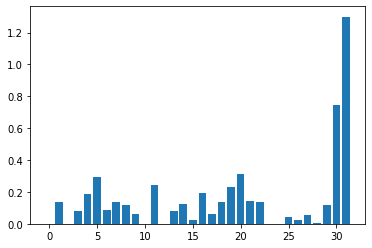

In [30]:

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999)
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  y_train_enc = le.fit_transform(y_train)
  y_test_enc = le.fit_transform(y_test)
  return y_train_enc, y_test_enc


# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('student-mat.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 30 which is Column 'G2' is the best most useful variable for prediction with a score of 0.782.

## Part d

In [49]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [50]:
%%R

library(rpart)

mydata = read.csv('student-mat.csv')

mydata$G3<-ifelse(mydata$G3>10,1,0)

mydata$G3

  [1] 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 [38] 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 [75] 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1
[112] 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
[149] 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
[186] 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
[223] 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1
[260] 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
[297] 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0
[334] 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1
[371] 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0


In [51]:
%%R

# Begin with a small cp. 
set.seed(123)
tree <- rpart(mydata$G3 ~ ., data = mydata, control = rpart.control(cp = 0.0001))

In [52]:
%%R

#cp value (with a simpler tree) that minimizes the xerror. 
printcp(tree)


Regression tree:
rpart(formula = mydata$G3 ~ ., data = mydata, control = rpart.control(cp = 1e-04))

Variables actually used in tree construction:
[1] famrel     G1         G2         goout      guardian   Mjob       nursery   
[8] traveltime

Root node error: 98.415/395 = 0.24915

n= 395 

          CP nsplit rel error  xerror      xstd
1  0.7543666      0   1.00000 1.00455 0.0061088
2  0.0293872      1   0.24563 0.24848 0.0435876
3  0.0185706      2   0.21625 0.24637 0.0431776
4  0.0139835      3   0.19768 0.25289 0.0411855
5  0.0118142      4   0.18369 0.26387 0.0421983
6  0.0043010      6   0.16006 0.25438 0.0406359
7  0.0025806      7   0.15576 0.27382 0.0427407
8  0.0023789      8   0.15318 0.27891 0.0427755
9  0.0012096     10   0.14842 0.27979 0.0429734
10 0.0011437     11   0.14721 0.28124 0.0429940
11 0.0001000     12   0.14607 0.28162 0.0429886


In [53]:
%%R

bestcp <- tree$cptable[which.min(tree$cptable[,"xerror"]),"CP"]

# Prune the tree using the best cp.
tree.pruned <- prune(tree, cp = bestcp)

In [54]:
%%R

# confusion matrix (training data)
conf.matrix <- table(mydata$G3, predict(tree.pruned,type="matrix"))
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ":")
colnames(conf.matrix) <- paste("Pred", colnames(conf.matrix), sep = ":")
print(conf.matrix)

          
           Pred:0.0594594594594595 Pred:0.714285714285714
  Actual:0                     174                      2
  Actual:1                      11                      5
          
           Pred:0.950738916256158
  Actual:0                     10
  Actual:1                    193


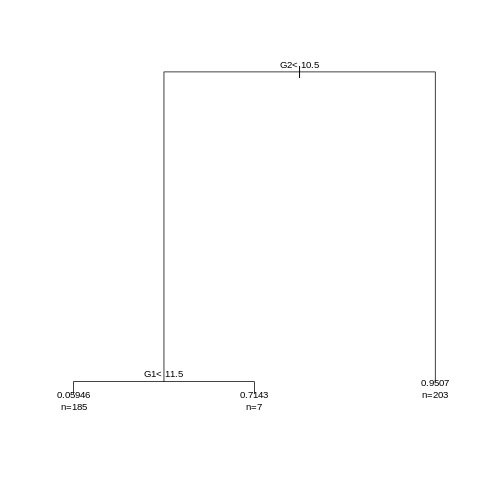

In [55]:
%%R

plot(tree.pruned)
text(tree.pruned, cex = 0.8, use.n = TRUE, xpd = TRUE)

In [23]:
%%R

install.packages("caret")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘e1071’, ‘ModelMetrics’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/e1071_1.7-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 566723 bytes (553 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [56]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data['school'] = number.fit_transform(data.school)
    data['sex'] = number.fit_transform(data.sex)
    data['address'] = number.fit_transform(data.address)
    data['famsize'] = number.fit_transform(data.famsize)
    data['Pstatus'] = number.fit_transform(data.Pstatus)
    data['Mjob'] = number.fit_transform(data.Mjob)
    data['Fjob'] = number.fit_transform(data.Fjob)
    data['reason'] = number.fit_transform(data.reason)
    data['guardian'] = number.fit_transform(data.guardian)
    data['schoolsup'] = number.fit_transform(data.schoolsup)
    data['famsup'] = number.fit_transform(data.famsup)
    data['paid'] = number.fit_transform(data.paid)
    data['activities'] = number.fit_transform(data.activities)
    data['nursery'] = number.fit_transform(data.nursery)
    data['higher'] = number.fit_transform(data.higher)
    data['internet'] = number.fit_transform(data.internet)
    data['romantic'] = number.fit_transform(data.romantic)
    data=data.fillna(-999)
    return data



In [66]:
mydata = %R mydata

mydata = convert(mydata)

mydata


school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
1         0    0   18        1        0        0     4     4     0     4  ...   
2         0    0   17        1        0        1     1     1     0     2  ...   
3         0    0   15        1        1        1     1     1     0     2  ...   
4         0    0   15        1        0        1     4     2     1     3  ...   
5         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
391       1    1   20        1        1        0     2     2     3     3  ...   
392       1    1   17        1        1        1     3     1     3     3  ...   
393       1    1   21        0        0        1     1     1     2     2  ...   
394       1    1   18        0        1        1     3     2     3     2  ...   
395       1    1   19        1        1        1     1     1     2     0  ...   

     famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2   G3  
1         4         3      4     1     1       3         6   5   6  0.0  
2         5         3      3     1     1       3         4   5   5  0.0  
3         4         3      2     2     3       3        10   7   8  0.0  
4         3         2      2     1     1       5         2  15  14  1.0  
5         4         3      2     1     2       5         4   6  10  0.0  
..      ...       ...    ...   ...   ...     ...       ...  ..  ..  ...  
391       5         5      4     4     5       4        11   9   9  0.0  
392       2         4      5     3     4       2         3  14  16  1.0  
393       5         5      3     3     3       3         3  10   8  0.0  
394       4         4      1     3     4       5         0  11  12  0.0  
395       3         2      3     3     3       5         5   8   9  0.0  

[395 rows x 33 columns]

In [73]:
%R -i mydata

In [79]:
%%R
library(caret)

In [85]:
#%%R

#mydata$school


#partition <- createDataPartition(y = mydata$G3, p = 0.8, list = FALSE)
#mydata_train <- mydata[partition, ]
#mydata_test <- mydata[-partition, ]

#set.seed(1234)
##mydata_cart_full <- rpart(mydata$G3 ~[mydata$school, mydata$sex, mydata$age, mydata$address, mydata$famsize, mydata$Pstatus, mydata$Medu, mydata$Fedu, mydata$Mjob, mydata$Fjob, mydata$reason, mydata$guardian, mydata$traveltime, mydata$studytime, mydata$failures, mydata$schoolsup, mydata$famsup, mydata$paid, mydata$activities, mydata$nursery, mydata$higher, mydata$internet, mydata$romantic, mydata$famrel, mydata$freetime, mydata$goout, mydata$Dalc, mydata$Walc, mydata$health, mydata$absences], mydata_train, method = "anova")
#print(mydata_cart_full)

In [87]:
%%R

set.seed(12345)
partition <- createDataPartition(y = mydata$G3, p = 0.8, list = FALSE)
mydata_train <- mydata[partition, ]
mydata_test <- mydata[-partition, ]



In [91]:
%%R

mydata_mdl_cart_full <- rpart(G3 ~ ., mydata_train, method = "anova")
print(mydata_mdl_cart_full)

n= 316 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 316 78.7436700 0.52848100  
   2) G2< 10.5 156 13.5576900 0.09615385  
     4) G2< 9.5 113  2.9203540 0.02654867 *
     5) G2>=9.5 43  8.6511630 0.27906980  
      10) nursery>=0.5 32  4.8750000 0.18750000 *
      11) nursery< 0.5 11  2.7272730 0.54545450 *
   3) G2>=10.5 160  7.6000000 0.95000000  
     6) G2< 11.5 27  5.1851850 0.74074070  
      12) traveltime>=1.5 12  3.0000000 0.50000000 *
      13) traveltime< 1.5 15  0.9333333 0.93333330 *
     7) G2>=11.5 133  0.9924812 0.99248120 *


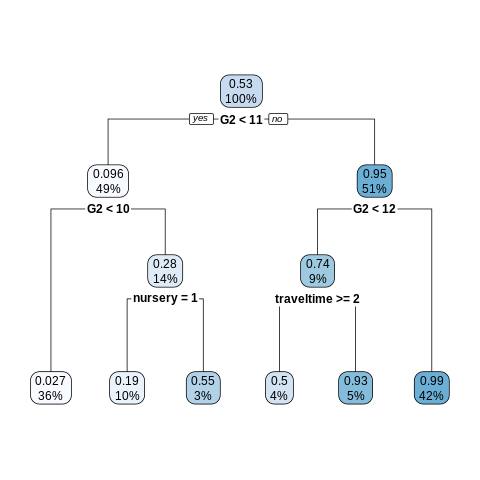

In [94]:
%%R

rpart.plot(mydata_mdl_cart_full, yesno = TRUE)

In [96]:
%%R

printcp(mydata_mdl_cart_full)


Regression tree:
rpart(formula = G3 ~ ., data = mydata_train, method = "anova")

Variables actually used in tree construction:
[1] G2         nursery    traveltime

Root node error: 78.744/316 = 0.24919

n= 316 

        CP nsplit rel error  xerror      xstd
1 0.731309      0   1.00000 1.01285 0.0070707
2 0.025223      1   0.26869 0.27138 0.0498361
3 0.018063      2   0.24347 0.28329 0.0476434
4 0.015898      3   0.22540 0.27898 0.0453017
5 0.013320      4   0.20951 0.26013 0.0423486
6 0.010000      5   0.19619 0.25945 0.0434712


In [99]:
%%R

install.packages("tidyverse")
library(tidyverse)


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [101]:
%%R

# SSE
data.frame(pred = predict(mydata_mdl_cart_full, newdata = mydata_train)) %>% 
   mutate(obs = mydata_train$G3,
          sq_err = (obs - pred)^2) %>% 
   summarize(sse = sum(sq_err))

       sse
1 15.44844


In [105]:
%%R

# Lowest possible error
mydata_mdl_cart_full$cptable %>%
   data.frame() %>%
   mutate(min_xerror_idx = which.min(mydata_mdl_cart_full$cptable[, "xerror"]),
          rownum = row_number(),
          xerror_cap = mydata_mdl_cart_full$cptable[min_xerror_idx, "xerror"] + 
             mydata_mdl_cart_full$cptable[min_xerror_idx, "xstd"],
          eval = case_when(rownum == min_xerror_idx ~ "min xerror",
                           xerror < xerror_cap ~ "under cap",
                           TRUE ~ "")) %>%
   select(-rownum, -min_xerror_idx) 

          CP nsplit rel.error    xerror        xstd xerror_cap       eval
1 0.73130930      0 1.0000000 1.0128548 0.007070651  0.3029196           
2 0.02522330      1 0.2686907 0.2713763 0.049836070  0.3029196  under cap
3 0.01806283      2 0.2434674 0.2832867 0.047643383  0.3029196  under cap
4 0.01589781      3 0.2254046 0.2789816 0.045301707  0.3029196  under cap
5 0.01332031      4 0.2095068 0.2601288 0.042348576  0.3029196  under cap
6 0.01000000      5 0.1961864 0.2594484 0.043471219  0.3029196 min xerror


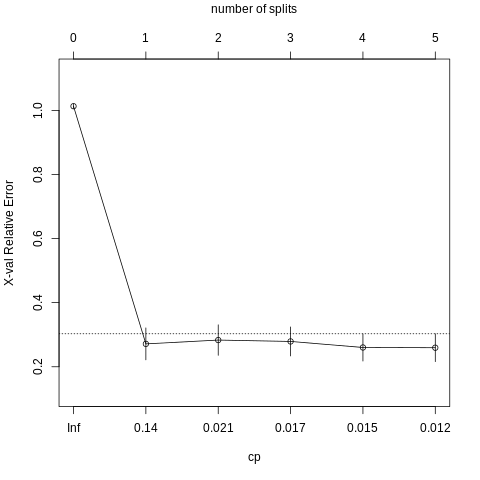

In [106]:
%%R
# Plot of relation between xerror and cp
plotcp(mydata_mdl_cart_full, upper = "splits")

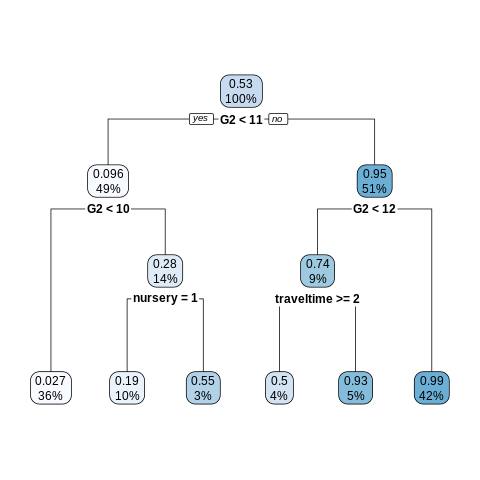

In [108]:
%%R

# Pruning with associated cp (cost complexity)
mydata_cart <- prune(
   mydata_mdl_cart_full,
   cp = mydata_mdl_cart_full$cptable[mydata_mdl_cart_full$cptable[, 2] == 5, "CP"]
)
rpart.plot(mydata_cart, yesno = TRUE)

In [113]:
# Generalization Error after pruning process

%%R

mydata_preds_cart <- predict(mydata_mdl_cart_full, mydata_test, type = "vector")

mydata_rmse_cart <- RMSE(
   pred = mydata_preds_cart,
   obs = mydata_test$G3
)
mydata_rmse_cart

[1] 0.1747115


R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



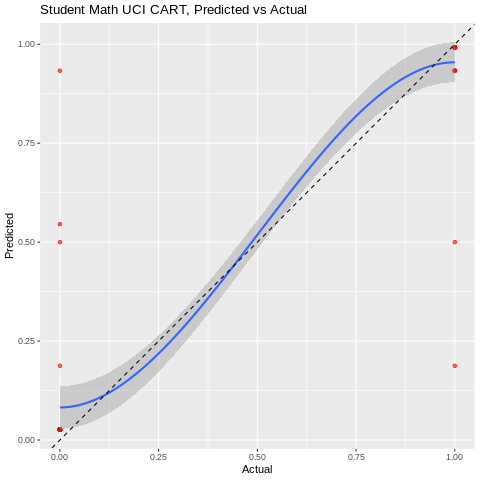

In [115]:
# Plot of predicted vs actual error

%%R

data.frame(Predicted = mydata_preds_cart, Actual = mydata_test$G3) %>%
   ggplot(aes(x = Actual, y = Predicted)) +
   geom_point(alpha = 0.6, color = "red") +
   geom_smooth() +
   geom_abline(intercept = 0, slope = 1, linetype = 2) +
   labs(title = "Student Math UCI CART, Predicted vs Actual")

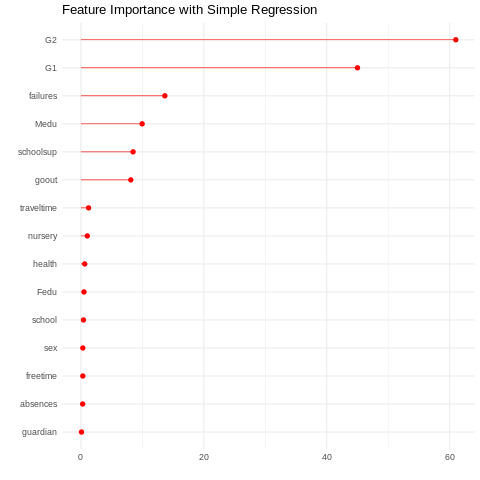

In [112]:
%%R

# Part c - Most useful variable for prediction

mydata_mdl_cart_full$variable.importance %>% 
   data.frame() %>%
   rownames_to_column(var = "Feature") %>%
   rename(Overall = '.') %>%
   ggplot(aes(x = fct_reorder(Feature, Overall), y = Overall)) +
   geom_pointrange(aes(ymin = 0, ymax = Overall), color = "red", size = .3) +
   theme_minimal() +
   coord_flip() +
   labs(x = "", y = "", title = "Feature Importance with Simple Regression")

The most important variable in prediction is G2 as we can see from above

# Q5

In [31]:
import pandas as pd
df = pd.read_csv('strange_binary.csv')

pd.options.display.max_rows = 9999
print(df)

     Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0             0           1           1           0           0           1   
1             1           0           0           1           1           1   
2             0           0           0           1           1           0   
3             0           0           1           1           0           0   
4             0           1           0           1           1           0   
5             1           0           1           1           1           0   
6             1           0           1           0           0           0   
7             0           1           1           1           0           1   
8             1           1           1           0           0           0   
9             1           0           1           0           1           1   
10            0           0           0           1           1           1   
11            1           0           1           1 

In [32]:
df.head()

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0           0           1           1           0           0           1   
1           1           0           0           1           1           1   
2           0           0           0           1           1           0   
3           0           0           1           1           0           0   
4           0           1           0           1           1           0   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9     c  
0           1           0           1           1  good  
1           0           0           1           1   bad  
2           0           1           1           0  good  
3           0           0           1           1  good  
4           0           0           0           0  good

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   Unnamed: 1  200 non-null    int64 
 2   Unnamed: 2  200 non-null    int64 
 3   Unnamed: 3  200 non-null    int64 
 4   Unnamed: 4  200 non-null    int64 
 5   Unnamed: 5  200 non-null    int64 
 6   Unnamed: 6  200 non-null    int64 
 7   Unnamed: 7  200 non-null    int64 
 8   Unnamed: 8  200 non-null    int64 
 9   Unnamed: 9  200 non-null    int64 
 10  c           200 non-null    object
dtypes: int64(10), object(1)
memory usage: 17.3+ KB


In [78]:
classification_column = np.where(df["c"] == 'good', True, False)


classified_col = []
for i in classification_column:
  if i==True:
    i=1 # good
  else:
    i=0 # bad
  classified_col.append(i)

classified_col = np.array(classified_col)

print(classified_col)

[1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 0 1]


In [79]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df['c'] = df['c'].replace(classified_col)
feature_cols = [0,1,2,3,4,5,6,7,8,9]
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
y = classified_col


In [80]:
# split the dataset into training and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [81]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [82]:
#Fit the model in the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [83]:
#prediction
y_pred = classifier.predict(X_test)

#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.62


In [84]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  9],
       [10, 24]])

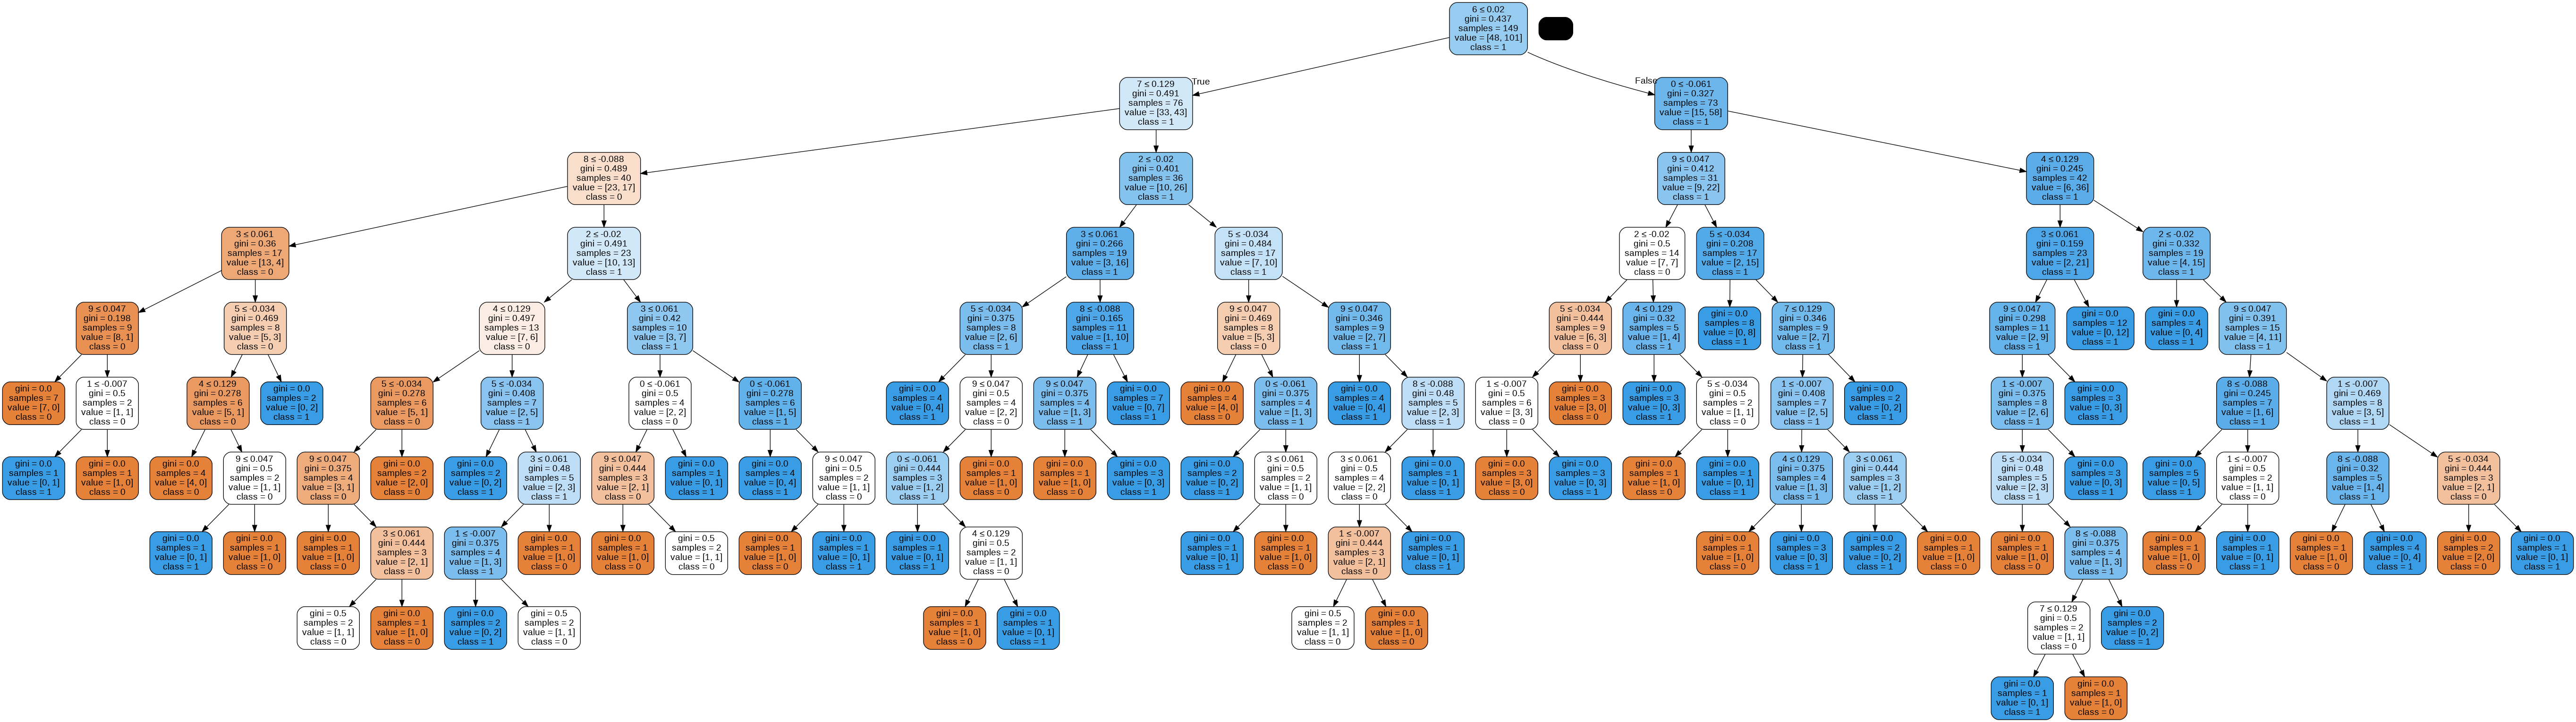

In [85]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
#Pruning

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.68


Yes, it is reasonable to assume that the test accuracy would be similar from the test data from this model. As we can see above the test accuracy is 0.68 which is close to 0.5, rather higher than the previous model.

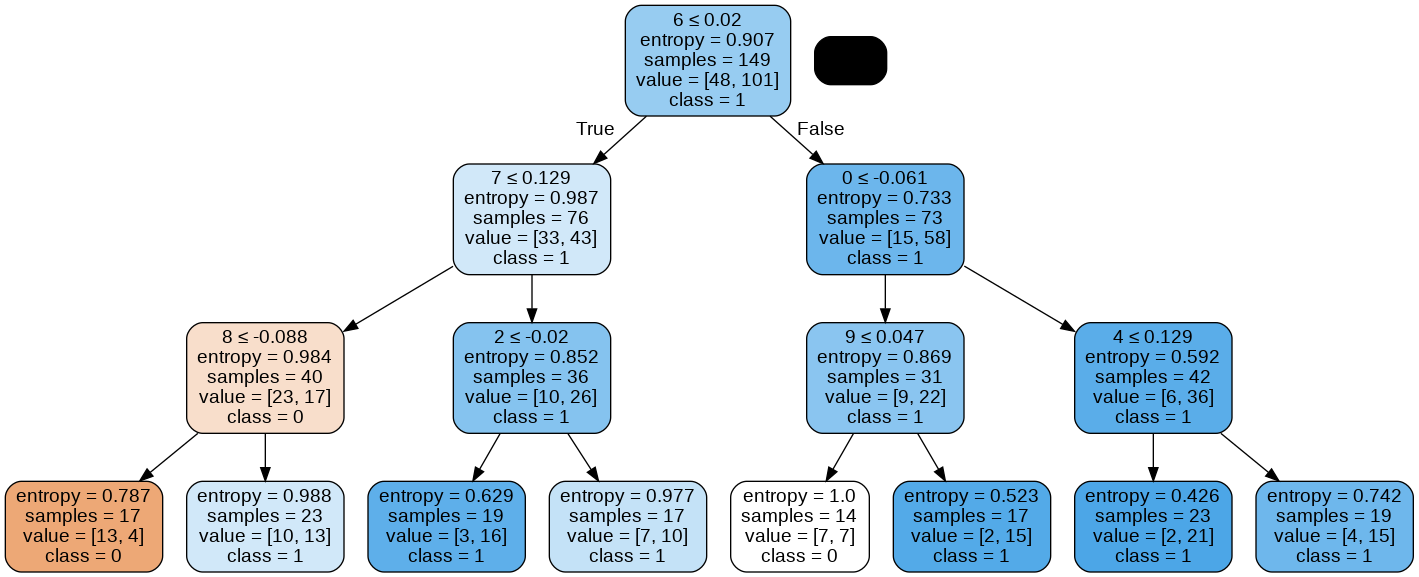

In [87]:
#Visualizing the pruned tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Part b

Feature 0: 0.000000
Feature 1: 0.054342
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.034426
Feature 5: 0.026036
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.070020


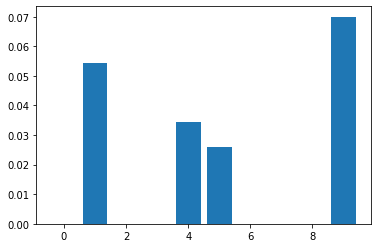

In [131]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999)
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  y_train_enc = le.fit_transform(y_train)
  y_test_enc = le.fit_transform(y_test)
  return y_train_enc, y_test_enc


# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('strange_binary.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=0)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [205]:
#feature 1+feature 4 + feature 5

one = df.iloc[:,[1]].values
four = df.iloc[:,[4]].values
five = df.iloc[:,[5]].values


new_col = []
for i in range(199):
  new_col.append(int(one[i]) + int(four[i]) * int(five[i]) )



print(new_col)

[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1]


In [208]:
feature_cols = [0,1,2,3,4,5,6,7,8,9, new_col]
df.insert(11,"lin_comb", new_col)
#df = df.drop(columns=['lin_comb'])
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]].values
y = classified_col

print(df)

     Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0             0           1           1           0           0           1   
1             1           0           0           1           1           1   
2             0           0           0           1           1           0   
3             0           0           1           1           0           0   
4             0           1           0           1           1           0   
5             1           0           1           1           1           0   
6             1           0           1           0           0           0   
7             0           1           1           1           0           1   
8             1           1           1           0           0           0   
9             1           0           1           0           1           1   
10            0           0           0           1           1           1   
12            0           0           1           1 

In [210]:
# split the dataset into training and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.55, random_state= 0)

In [211]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [212]:
#Fit the model in the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [213]:
#prediction
y_pred = classifier.predict(X_test)

#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.6545454545454545


In [214]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 15],
       [23, 54]])

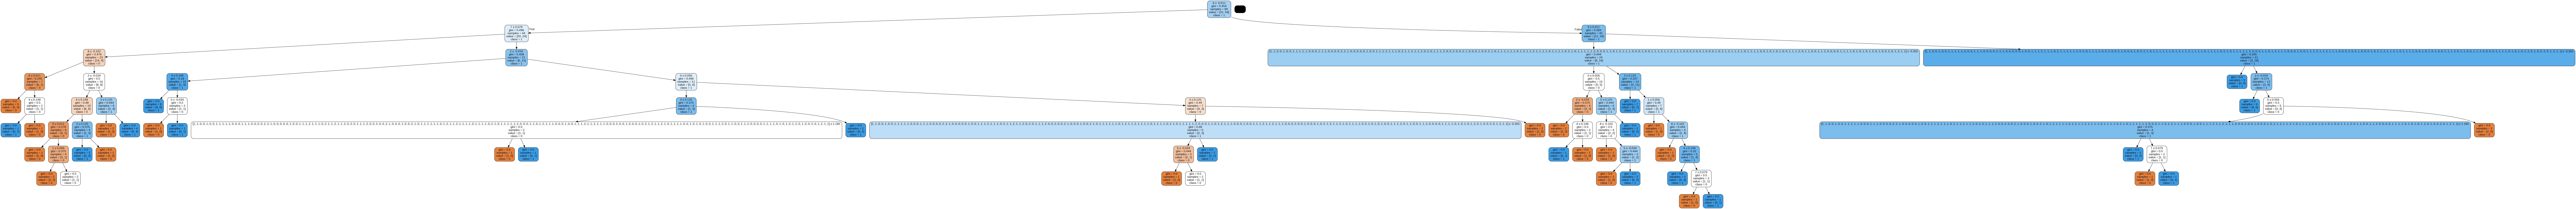

In [215]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [220]:
#Pruning

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7090909090909091


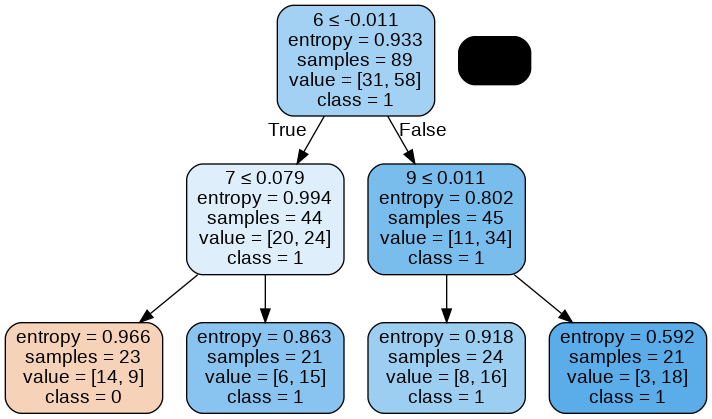

In [221]:
#Visualizing the pruned tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Q7 Extra Credit

In [1]:
import numpy as np
import sys
from scipy.stats import entropy
import scipy.stats
from math import log, e
import pandas as pd
import operator

WORDLE_TEST_FILENAME = "words5.txt"


def get_my_word_list(filename):
  wordlist=[]
  with open(filename, 'r') as file:
    for line in file:
      for word in line.split():
        wordlist.append(word)
  return wordlist


def entropy1(word, wordlist):
  p_data = wordlist.count(word)         # counts occurrence of each value
  entropy = scipy.stats.entropy(p_data)  # get entropy from counts
  return entropy

def play(wordlist):
  entropy_dict={}
  for word in wordlist:
    word_entropy = entropy1(word, wordlist)
    entropy_dict[word]=word_entropy
  max_keys = [key for key, value in entropy_dict.items() if value == max(entropy_dict.values())]
  return (max_keys)
    

if __name__ == "__main__":

  print("Parsing command line arguments and loading distribution...")

  # parse command line arguments
  if len(sys.argv) < 1:
    exit()
  play_option = sys.argv[1]
  if play_option == WORDLE_TEST_FILENAME:
    wordlist = get_my_word_list(play_option)
    ans = play(wordlist)
    print ("The words with the max entropy are: ", ans)
  else:
    exit()
 

Parsing command line arguments and loading distribution...


(base) shubhaviarya@Shubhavis-MacBook-Pro hw4 % python3 wordle.py words5.txt
Parsing command line arguments and loading distribution...
The words with the max entropy are:  ['aalii', 'abaca', 'aback', 'abaff', 'abaft', 'abase', 'abash', 'abask', 'abate', 'abave', 'abaze', 'abbas', 'abbey', 'abbot', 'abdal', 'abdat', 'abeam', 'abear', 'abele', 'abhor', 'abide', 'abidi', 'abilo', 'abkar', 'abler', 'ablow', 'abmho', 'abnet', 'abode', 'abody', 'abohm', 'aboil', 'aboma', 'aboon', 'abord', 'abort', 'about', 'above', 'abret', 'abrim', 'abrin', 'absit', 'abuna', 'abura', 'abuse', 'abuzz', 'abwab', 'abysm', 'abyss', 'acana', 'acapu', 'acara', 'acari', 'acate', 'accoy', 'acedy', 'acerb', 'achar', 'acher', 'achor', 'acier', 'acker', 'ackey', 'aclys', 'acmic', 'acock', 'acoin', 'acold', 'acoma', 'acone', 'acorn', 'acred', 'acrid', 'acron', 'acryl', 'actin', 'acton', 'actor', 'acute', 'adage', 'adapt', 'adati', 'adawe', 'adawn', 'adays', 'addax', 'added', 'adder', 'addle', 'adead', 'adeem', 'adeep', 'adept', 'adfix', 'adieu', 'adion', 'adjag', 'adlay', 'adlet', 'adman', 'admit', 'admix', 'adnex', 'adobe', 'adopt', 'adore', 'adorn', 'adown', 'adoxy', 'adoze', 'adpao', 'adrip', 'adrop', 'adrue', 'adult', 'adunc', 'adusk', 'adust', 'adyta', 'adzer', 'aegis', 'aeric', 'aerie', 'aevia', 'aface', 'afara', 'afear', 'affix', 'afire', 'aflat', 'aflow', 'afoam', 'afoot', 'afore', 'afoul', 'afret', 'after', 'again', 'agama', 'agami', 'agamy', 'agape', 'agasp', 'agate', 'agaty', 'agaze', 'agent', 'agger', 'aggry', 'aggur', 'agile', 'aging', 'agist', 'aglet', 'agley', 'aglow', 'agnel', 'agnus', 'agoge', 'agoho', 'agone', 'agony', 'agora', 'agrah', 'agral', 'agree', 'agria', 'agrin', 'agrom', 'agsam', 'aguey', 'agush', 'agust', 'ahead', 'aheap', 'ahind', 'ahint', 'ahong', 'ahsan', 'ahull', 'ahunt', 'ahura', 'ahush', 'ahwal', 'aider', 'aillt', 'aimer', 'ainoi', 'airan', 'airer', 'aisle', 'aitch', 'aiwan', 'aizle', 'ajaja', 'ajari', 'ajava', 'ajhar', 'akala', 'akasa', 'akebi', 'akeki', 'aknee', 'akpek', 'akule', 'akund', 'alack', 'alada', 'alala', 'alamo', 'aland', 'alani', 'alarm', 'alary', 'alate', 'alban', 'albee', 'album', 'albus', 'alder', 'aldim', 'aldol', 'aleak', 'aleft', 'aleph', 'alert', 'alfet', 'algae', 'algal', 'algic', 'algid', 'algin', 'algor', 'algum', 'alias', 'alibi', 'alien', 'align', 'alike', 'alima', 'alish', 'aliso', 'alisp', 'alist', 'alite', 'alive', 'alkyd', 'alkyl', 'allan', 'allay', 'aller', 'alley', 'allot', 'allow', 'alloy', 'allyl', 'almon', 'almud', 'almug', 'alody', 'aloed', 'aloft', 'alogy', 'aloid', 'aloin', 'aloma', 'alone', 'along', 'aloof', 'alose', 'aloud', 'alowe', 'alpha', 'altar', 'alter', 'altho', 'altin', 'altun', 'alula', 'alure', 'aluta', 'alvar', 'alvus', 'alway', 'amaas', 'amaga', 'amain', 'amala', 'amang', 'amani', 'amapa', 'amass', 'amaze', 'amban', 'ambar', 'ambay', 'amber', 'ambit', 'amble', 'ambon', 'ambos', 'ambry', 'ameed', 'ameen', 'amelu', 'amend', 'amene', 'ament', 'amhar', 'amice', 'amide', 'amido', 'amine', 'amini', 'amino', 'amiss', 'amity', 'amman', 'ammer', 'amnia', 'amnic', 'amoke', 'amole', 'among', 'amort', 'amour', 'amove', 'amper', 'ample', 'amply', 'ampul', 'ampyx', 'amsel', 'amuck', 'amula', 'amuse', 'amuze', 'amvis', 'amylo', 'anabo', 'anama', 'anana', 'ancon', 'anear', 'anele', 'anend', 'anent', 'angel', 'anger', 'angle', 'angor', 'angry', 'angst', 'anigh', 'anile', 'anima', 'anime', 'animi', 'anion', 'anise', 'anjan', 'ankee', 'anker', 'ankle', 'ankus', 'annal', 'annat', 'annet', 'annex', 'annoy', 'annul', 'anode', 'anoil', 'anole', 'anoli', 'anomy', 'ansar', 'antal', 'antes', 'antic', 'antra', 'antre', 'anury', 'anvil', 'aorta', 'apace', 'apaid', 'apart', 'apeak', 'apert', 'apery', 'aphid', 'apian', 'apiin', 'aping', 'apish', 'apism', 'apnea', 'apoop', 'aport', 'apout', 'appay', 'appet', 'apple', 'apply', 'apron', 'apsis', 'aptly', 'araba', 'araca', 'arado', 'arain', 'arake', 'arara', 'arati', 'arbor', 'arche', 'archy', 'ardeb', 'ardor', 'ardri', 'aread', 'areal', 'arear', 'areek', 'areel', 'arena', 'arend', 'areng', 'arent', 'arete', 'argal', 'argel', 'argil', 'argol', 'argon', 'argot', 'argue', 'arhar', 'arhat', 'ariel', 'ariot', 'arise', 'arist', 'arite', 'arjun', 'arles', 'armed', 'armer', 'armet', 'armil', 'armor', 'arnee', 'arnut', 'aroar', 'arock', 'aroid', 'aroma', 'aroon', 'arose', 'arpen', 'arrah', 'arras', 'arrau', 'array', 'arrie', 'arris', 'arrow', 'arses', 'arsis', 'arsle', 'arson', 'arsyl', 'artal', 'artar', 'artel', 'artha', 'aruke', 'arupa', 'arusa', 'arval', 'arvel', 'arzan', 'arzun', 'asale', 'asana', 'ascan', 'ascii', 'ascon', 'ascot', 'ascry', 'ascus', 'asdic', 'ashen', 'ashes', 'ashet', 'ashur', 'aside', 'askar', 'asker', 'askew', 'askip', 'askos', 'aslop', 'asoak', 'asoka', 'aspen', 'asper', 'aspic', 'assai', 'assay', 'asset', 'assis', 'astay', 'aster', 'astir', 'astor', 'asway', 'aswim', 'asyla', 'atavi', 'ataxy', 'atelo', 'athar', 'atilt', 'atlas', 'atlee', 'atman', 'atmid', 'atmos', 'atoke', 'atoll', 'atomy', 'atone', 'atony', 'atopy', 'atour', 'atria', 'atrip', 'attar', 'atter', 'attic', 'attid', 'atule', 'atune', 'atwin', 'atypy', 'audio', 'audit', 'augen', 'auger', 'aught', 'augur', 'aulae', 'aulic', 'auloi', 'aulos', 'aumil', 'aurae', 'aural', 'aurar', 'auric', 'aurin', 'aurir', 'aurum', 'auryl', 'autem', 'auxin', 'avahi', 'avail', 'avast', 'avens', 'avera', 'avert', 'avian', 'avick', 'avine', 'aviso', 'avoid', 'awabi', 'awaft', 'await', 'awake', 'awald', 'awalt', 'awane', 'award', 'aware', 'awash', 'awave', 'awber', 'aweek', 'aweel', 'awest', 'aweto', 'awful', 'awhet', 'awhir', 'awide', 'awing', 'awink', 'awiwi', 'awned', 'awner', 'awoke', 'awork', 'axial', 'axile', 'axine', 'axiom', 'axion', 'axite', 'axled', 'axman', 'axoid', 'ayelp', 'aylet', 'ayllu', 'ayond', 'ayont', 'ayous', 'azide', 'azine', 'azoch', 'azofy', 'azoic', 'azole', 'azote', 'azoth', 'azoxy', 'azure', 'azury', 'azyme', 'babai', 'babby', 'baboo', 'babul', 'bacao', 'bacca', 'bache', 'bacon', 'badan', 'badge', 'badly', 'baffy', 'bafta', 'bagel', 'baggy', 'bagre', 'bahan', 'bahar', 'bahay', 'bahoe', 'bahoo', 'bahur', 'bahut', 'baioc', 'bairn', 'baith', 'baize', 'bajan', 'bajra', 'bajri', 'bakal', 'baked', 'baken', 'baker', 'bakie', 'bakli', 'balai', 'balao', 'balas', 'baldy', 'balei', 'baler', 'balky', 'balli', 'bally', 'balmy', 'baloo', 'balow', 'balsa', 'balut', 'balza', 'banak', 'banal', 'banat', 'banca', 'banco', 'banda', 'bande', 'bandi', 'bando', 'bandy', 'banga', 'bange', 'banig', 'banjo', 'banky', 'banns', 'banty', 'banya', 'barad', 'barbe', 'bardo', 'bardy', 'barer', 'barff', 'barge', 'bargh', 'baria', 'baric', 'barid', 'barie', 'baris', 'barit', 'barky', 'barmy', 'barny', 'baroi', 'baron', 'barra', 'barry', 'barse', 'barth', 'barye', 'basal', 'based', 'bases', 'basic', 'basil', 'basin', 'basis', 'bason', 'basos', 'basso', 'basta', 'baste', 'basto', 'batad', 'batch', 'batea', 'bated', 'batel', 'bater', 'bathe', 'batik', 'baton', 'batta', 'batty', 'bauch', 'bauno', 'bauta', 'bavin', 'bayal', 'bayed', 'bayok', 'bayou', 'bazoo', 'beach', 'beady', 'beaky', 'beala', 'beamy', 'beano', 'beant', 'beany', 'beard', 'bearm', 'beast', 'beata', 'beath', 'beaux', 'bebar', 'bebat', 'bebay', 'bebed', 'bebog', 'bebop', 'becap', 'becry', 'becut', 'bedad', 'beday', 'bedel', 'beden', 'bedew', 'bedim', 'bedin', 'bedip', 'bedog', 'bedot', 'bedub', 'bedur', 'bedye', 'beech', 'beefy', 'beery', 'beest', 'beeth', 'beety', 'beeve', 'befan', 'befit', 'befog', 'befop', 'begad', 'begar', 'begat', 'begay', 'begem', 'beget', 'begin', 'begob', 'begum', 'begun', 'begut', 'behap', 'behen', 'beice', 'beige', 'being', 'beira', 'beisa', 'bejan', 'bejel', 'bejig', 'bekah', 'bekko', 'belah', 'belam', 'belar', 'belay', 'belch', 'belee', 'belga', 'belie', 'belle', 'belly', 'below', 'belve', 'bemad', 'beman', 'bemar', 'bemat', 'bemix', 'bemud', 'benab', 'bench', 'benda', 'bendy', 'benet', 'benjy', 'benne', 'benny', 'bensh', 'benty', 'benzo', 'beode', 'bepat', 'bepaw', 'bepen', 'bepun', 'berat', 'beray', 'beret', 'bergy', 'berne', 'berri', 'berry', 'berth', 'beryl', 'besan', 'besee', 'beset', 'besin', 'besit', 'besom', 'besot', 'bespy', 'besra', 'betag', 'betel', 'betis', 'betso', 'betty', 'bevel', 'bever', 'bevue', 'bewet', 'bewig', 'bezel', 'bezzi', 'bezzo', 'bhalu', 'bhang', 'bhara', 'bhava', 'biabo', 'bichy', 'bidar', 'biddy', 'bider', 'bidet', 'bidri', 'bield', 'bifer', 'bifid', 'bigha', 'bight', 'bigot', 'bijou', 'bilbo', 'bilby', 'bilch', 'bilge', 'bilgy', 'bilic', 'bilio', 'billa', 'billy', 'bilsh', 'binal', 'binge', 'bingo', 'bingy', 'binna', 'biome', 'biose', 'biota', 'biped', 'bipod', 'birch', 'birdy', 'birle', 'birma', 'birny', 'birse', 'birsy', 'birth', 'bison', 'bisti', 'bitch', 'biter', 'bitty', 'biune', 'bixin', 'bizet', 'black', 'blade', 'blady', 'blaff', 'blain', 'blair', 'blake', 'blame', 'blanc', 'bland', 'blank', 'blare', 'blart', 'blase', 'blash', 'blast', 'blate', 'blaze', 'blazy', 'bleak', 'blear', 'bleat', 'bleck', 'bleed', 'blend', 'blent', 'bless', 'blest', 'blibe', 'blick', 'blimp', 'blimy', 'blind', 'blink', 'bliss', 'blite', 'blitz', 'blizz', 'bloat', 'block', 'bloke', 'blood', 'bloom', 'bloop', 'blore', 'blout', 'blown', 'blowy', 'bluer', 'blues', 'bluet', 'bluey', 'bluff', 'blunk', 'blunt', 'blurb', 'blurt', 'blush', 'blype', 'board', 'boast', 'bobac', 'bobby', 'bocal', 'bocca', 'bocce', 'bocoy', 'boden', 'boder', 'bodge', 'bodhi', 'bodle', 'bogan', 'bogey', 'boggy', 'bogie', 'bogle', 'bogue', 'bogum', 'bogus', 'bohea', 'bohor', 'boily', 'boist', 'bokom', 'bolar', 'boldo', 'boled', 'bolis', 'bolly', 'bolti', 'bolus', 'bombo', 'bonce', 'boned', 'boner', 'bongo', 'bonny', 'bonus', 'bonze', 'booby', 'boody', 'booky', 'booly', 'boomy', 'boonk', 'boort', 'boose', 'boost', 'boosy', 'booth', 'boots', 'booty', 'booze', 'boozy', 'borak', 'boral', 'borax', 'boree', 'borer', 'borgh', 'boric', 'borne', 'boron', 'borty', 'bortz', 'boryl', 'bosch', 'boser', 'bosky', 'bosom', 'bossy', 'bosun', 'botch', 'bothy', 'bouge', 'bough', 'boule', 'bound', 'bourd', 'bourg', 'bourn', 'bouse', 'bousy', 'bouto', 'bovid', 'bowed', 'bowel', 'bower', 'bowet', 'bowie', 'bowla', 'bowls', 'bowly', 'boxen', 'boxer', 'boxty', 'boyar', 'boyer', 'boyla', 'bozal', 'bozze', 'braca', 'brace', 'brach', 'brack', 'bract', 'braid', 'brail', 'brain', 'brake', 'braky', 'brand', 'brank', 'brant', 'brash', 'brass', 'brave', 'bravo', 'brawl', 'brawn', 'braws', 'braxy', 'braza', 'braze', 'bread', 'break', 'bream', 'breba', 'breck', 'brede', 'bredi', 'breed', 'breek', 'breme', 'brent', 'breth', 'brett', 'breva', 'breve', 'briar', 'bribe', 'brick', 'bride', 'brief', 'brier', 'brill', 'brine', 'bring', 'brink', 'briny', 'brisk', 'briss', 'brith', 'brizz', 'broad', 'broch', 'brock', 'broil', 'broke', 'broll', 'broma', 'brome', 'bronc', 'bronk', 'brood', 'brook', 'brool', 'broom', 'broon', 'brose', 'brosy', 'broth', 'brown', 'brugh', 'bruin', 'bruit', 'bruke', 'brume', 'brunt', 'brush', 'brute', 'bruzz', 'buaze', 'bubal', 'bubby', 'bucca', 'buchu', 'bucko', 'bucky', 'buddy', 'budge', 'buffy', 'bugan', 'buggy', 'bugle', 'bugre', 'build', 'built', 'buist', 'bulak', 'bulby', 'bulge', 'bulgy', 'bulky', 'bulla', 'bully', 'bulse', 'bumbo', 'bumpy', 'bunce', 'bunch', 'bundy', 'bungo', 'bungy', 'bunko', 'bunny', 'bunty', 'bunya', 'buran', 'burao', 'burel', 'buret', 'burgh', 'burin', 'burka', 'burke', 'burly', 'burnt', 'burny', 'burro', 'burry', 'bursa', 'burse', 'burst', 'busby', 'bushi', 'bushy', 'busky', 'bussu', 'butch', 'butic', 'butte', 'butty', 'butyl', 'butyr', 'buxom', 'buyer', 'buzzy', 'bylaw', 'byous', 'bysen', 'byway', 'caama', 'cabal', 'caban', 'cabas', 'cabby', 'cabda', 'caber', 'cabin', 'cabio', 'cable', 'cabob', 'cabot', 'cacam', 'cacao', 'cache', 'cacti', 'cacur', 'caddy', 'cader', 'cadet', 'cadew', 'cadge', 'cadgy', 'cados', 'cadre', 'cadua', 'cadus', 'caeca', 'caffa', 'cafiz', 'caged', 'cager', 'cagey', 'caggy', 'cagit', 'cahiz', 'cahot', 'cahow', 'caird', 'cairn', 'cajun', 'caker', 'cakey', 'calid', 'calix', 'calli', 'callo', 'calmy', 'calor', 'calve', 'calyx', 'caman', 'camel', 'cameo', 'campo', 'camus', 'canal', 'canch', 'candy', 'canel', 'caner', 'canid', 'canna', 'canny', 'canoe', 'canon', 'canso', 'canto', 'canty', 'canun', 'caoba', 'capax', 'caped', 'capel', 'caper', 'capes', 'capon', 'capot', 'cappy', 'capsa', 'carat', 'carbo', 'cardo', 'carer', 'caret', 'carga', 'cargo', 'carid', 'carls', 'caroa', 'carob', 'carol', 'carom', 'carry', 'carse', 'carte', 'carty', 'carua', 'carve', 'caryl', 'casal', 'casco', 'cased', 'caser', 'casha', 'casse', 'caste', 'catan', 'catch', 'cater', 'catty', 'cauch', 'cauda', 'cauld', 'cauma', 'caupo', 'cause', 'cavae', 'caval', 'cavel', 'cavie', 'cavil', 'cavus', 'cawky', 'caxon', 'cease', 'cebid', 'cebil', 'cebur', 'cedar', 'ceder', 'cedre', 'cedry', 'ceibo', 'ceile', 'cella', 'cello', 'cense', 'cento', 'ceorl', 'cequi', 'ceral', 'ceras', 'cerci', 'cered', 'cerer', 'ceria', 'ceric', 'cerin', 'certy', 'ceryl', 'cetic', 'cetin', 'cetyl', 'chack', 'chafe', 'chaff', 'chaft', 'chain', 'chair', 'chais', 'chaja', 'chaka', 'chalk', 'champ', 'chang', 'chank', 'chant', 'chaos', 'chape', 'chaps', 'chapt', 'chard', 'chare', 'chark', 'charm', 'charr', 'chart', 'chary', 'chase', 'chasm', 'chati', 'chauk', 'chaus', 'chawk', 'chawl', 'chaya', 'cheap', 'cheat', 'check', 'cheek', 'cheep', 'cheer', 'cheet', 'cheir', 'cheke', 'cheki', 'chela', 'chelp', 'chena', 'cheng', 'chert', 'chess', 'chest', 'cheth', 'cheve', 'chevy', 'chewy', 'chick', 'chico', 'chide', 'chief', 'chien', 'child', 'chile', 'chili', 'chill', 'chime', 'china', 'chine', 'ching', 'chink', 'chino', 'chint', 'chips', 'chirk', 'chirm', 'chiro', 'chirp', 'chirr', 'chive', 'chlor', 'choca', 'chock', 'choel', 'choga', 'choil', 'choir', 'choke', 'choky', 'chola', 'chold', 'choli', 'chomp', 'choop', 'chopa', 'chord', 'chore', 'chort', 'chose', 'chott', 'choup', 'chous', 'chowk', 'choya', 'chria', 'chuck', 'chufa', 'chuff', 'chump', 'chunk', 'churl', 'churm', 'churn', 'churr', 'chute', 'chyak', 'chyle', 'chyme', 'cibol', 'cicad', 'cicer', 'cider', 'cigar', 'cigua', 'cilia', 'cimex', 'cinch', 'cinct', 'cinel', 'circa', 'cirri', 'cisco', 'cista', 'citee', 'citer', 'citua', 'civet', 'civic', 'civil', 'civvy', 'clack', 'claim', 'clamb', 'clame', 'clamp', 'clang', 'clank', 'clapt', 'clark', 'claro', 'clart', 'clary', 'clash', 'clasp', 'class', 'claut', 'clava', 'clave', 'clavy', 'clawk', 'clead', 'cleam', 'clean', 'clear', 'cleat', 'cleck', 'cleek', 'cleft', 'clerk', 'cleve', 'click', 'cliff', 'clift', 'clima', 'climb', 'clime', 'cline', 'cling', 'clink', 'clint', 'clips', 'clipt', 'clite', 'clive', 'cloak', 'cloam', 'clock', 'cloff', 'cloit', 'clomb', 'clone', 'cloof', 'cloop', 'cloot', 'close', 'closh', 'clote', 'cloth', 'cloud', 'clour', 'clout', 'clove', 'clown', 'cluck', 'cluff', 'clump', 'clung', 'clunk', 'clyer', 'clype', 'cnida', 'coach', 'coact', 'coaid', 'coaly', 'coapt', 'coarb', 'coast', 'coati', 'coaxy', 'cobby', 'cobia', 'coble', 'cobra', 'cocci', 'cocco', 'cocky', 'cocoa', 'coder', 'codex', 'codol', 'codon', 'cogon', 'cogue', 'cohol', 'coign', 'coiny', 'coker', 'colic', 'colin', 'colly', 'colon', 'color', 'colza', 'comal', 'comby', 'comer', 'comes', 'comet', 'comfy', 'comic', 'comma', 'compo', 'conal', 'conch', 'coned', 'coner', 'cones', 'conga', 'conic', 'conin', 'conky', 'conte', 'conto', 'conus', 'cooba', 'cooee', 'cooer', 'cooja', 'cooky', 'cooly', 'coomb', 'coomy', 'coony', 'coost', 'copal', 'copei', 'copen', 'coper', 'copis', 'coppy', 'copra', 'copse', 'copsy', 'copus', 'coque', 'corah', 'coral', 'coram', 'cordy', 'cored', 'corer', 'corge', 'corgi', 'corke', 'corky', 'cornu', 'corny', 'coroa', 'corol', 'corps', 'corse', 'corta', 'coryl', 'cosec', 'coset', 'cosse', 'costa', 'cotch', 'cothe', 'cothy', 'cotta', 'cotte', 'cotty', 'couac', 'couch', 'coude', 'cough', 'could', 'couma', 'count', 'coupe', 'courb', 'court', 'couth', 'coved', 'cover', 'covet', 'covey', 'covid', 'covin', 'cowal', 'cower', 'cowle', 'coxal', 'coyan', 'coyly', 'coyol', 'coypu', 'cozen', 'crack', 'craft', 'crain', 'crake', 'cramp', 'crane', 'crank', 'crape', 'craps', 'crapy', 'crare', 'crash', 'crass', 'crate', 'crave', 'cravo', 'crawl', 'crawm', 'craze', 'crazy', 'creak', 'cream', 'creat', 'creed', 'creek', 'creel', 'creem', 'creen', 'creep', 'crena', 'crepe', 'crept', 'crepy', 'cress', 'crest', 'creta', 'cribo', 'crick', 'cried', 'crier', 'criey', 'crile', 'crime', 'crimp', 'crine', 'crink', 'crisp', 'criss', 'crith', 'croak', 'croci', 'crock', 'croft', 'crome', 'crone', 'cronk', 'crony', 'crood', 'crook', 'crool', 'croon', 'crore', 'crosa', 'cross', 'croup', 'crout', 'crowd', 'crowl', 'crown', 'croze', 'cruce', 'cruck', 'crude', 'cruel', 'cruet', 'crumb', 'crump', 'crunk', 'crunt', 'cruor', 'cruse', 'crush', 'crust', 'cruth', 'crypt', 'ctene', 'cubby', 'cubeb', 'cuber', 'cubic', 'cubit', 'cuddy', 'cueca', 'cuffy', 'culet', 'culla', 'cully', 'culmy', 'culpa', 'cumal', 'cumay', 'cumbu', 'cumic', 'cumin', 'cumol', 'cumyl', 'cunye', 'cupay', 'cupel', 'cuppy', 'curby', 'curch', 'curdy', 'curer', 'curie', 'curin', 'curio', 'curly', 'curry', 'curse', 'curst', 'curua', 'curve', 'curvy', 'cusec', 'cushy', 'cusie', 'cusso', 'cutch', 'cutie', 'cutin', 'cutis', 'cutty', 'cutup', 'cyath', 'cycad', 'cycle', 'cylix', 'cymar', 'cymba', 'cynic', 'cypre', 'cyrus', 'cyton', 'dabba', 'dabby', 'dadap', 'daddy', 'daffy', 'dagga', 'daggy', 'daily', 'daira', 'dairi', 'dairy', 'daisy', 'daiva', 'daker', 'dakir', 'dalar', 'daler', 'dalle', 'dally', 'daman', 'damie', 'damme', 'dampy', 'dance', 'danda', 'dandy', 'danio', 'danli', 'danta', 'darac', 'daraf', 'darat', 'darby', 'darer', 'daric', 'darky', 'daroo', 'darst', 'darts', 'dashy', 'dasnt', 'dassy', 'datch', 'dater', 'datil', 'datum', 'daube', 'dauby', 'daunt', 'daven', 'daver', 'davit', 'dawdy', 'dawny', 'dawut', 'dayal', 'dazed', 'deair', 'dealt', 'deary', 'deash', 'death', 'deave', 'debar', 'debby', 'deben', 'debit', 'debus', 'debut', 'decad', 'decal', 'decan', 'decap', 'decay', 'decil', 'decke', 'decoy', 'decry', 'decus', 'decyl', 'deedy', 'defat', 'defer', 'defog', 'degas', 'degum', 'deice', 'deify', 'deign', 'deink', 'deism', 'deist', 'deity', 'dekko', 'dekle', 'delay', 'delft', 'delta', 'delve', 'demal', 'demit', 'demob', 'demon', 'demos', 'denat', 'denda', 'denim', 'dense', 'denty', 'deota', 'depas', 'depoh', 'depot', 'depth', 'derah', 'derat', 'deray', 'derby', 'deric', 'derma', 'derry', 'desex', 'desma', 'dessa', 'desyl', 'detar', 'detax', 'deter', 'detin', 'detur', 'deuce', 'devil', 'devow', 'dewan', 'dewax', 'dewer', 'dhabb', 'dhava', 'dheri', 'dhobi', 'dhole', 'dhoni', 'dhoon', 'dhoti', 'dhoul', 'dhyal', 'diact', 'diamb', 'diary', 'dicer', 'dicky', 'dicot', 'dicta', 'diddy', 'didie', 'didle', 'didna', 'didnt', 'didst', 'didym', 'diene', 'dight', 'digit', 'diker', 'dildo', 'dilli', 'dilly', 'dimer', 'dimit', 'dimly', 'dimps', 'dinar', 'diner', 'dinge', 'dingo', 'dingy', 'dinic', 'dinky', 'dinus', 'diode', 'diose', 'diota', 'dioxy', 'dirge', 'dirty', 'disme', 'disna', 'dital', 'ditch', 'diter', 'ditto', 'ditty', 'divan', 'divel', 'diver', 'divot', 'divus', 'divvy', 'dixie', 'dixit', 'dizen', 'dizzy', 'djave', 'dobby', 'dobla', 'dobra', 'doddy', 'dodge', 'dodgy', 'doest', 'dogal', 'doggo', 'doggy', 'dogie', 'dogly', 'dogma', 'doigt', 'doily', 'doina', 'doing', 'dolia', 'dolly', 'dolor', 'domal', 'domba', 'domer', 'domic', 'dompt', 'donax', 'donee', 'doney', 'donga', 'donna', 'donor', 'donum', 'dooja', 'dooli', 'dooly', 'dooms', 'doper', 'dopey', 'dorab', 'dorad', 'doree', 'doria', 'dorje', 'dormy', 'dorts', 'dorty', 'doser', 'dosis', 'dotal', 'doted', 'doter', 'dotty', 'douar', 'doubt', 'douce', 'dough', 'douse', 'dover', 'dowdy', 'dowed', 'dowel', 'dower', 'dowie', 'downy', 'dowry', 'dowse', 'dozed', 'dozen', 'dozer', 'draff', 'draft', 'drago', 'drail', 'drain', 'drake', 'drama', 'dramm', 'drang', 'drank', 'drant', 'drape', 'drate', 'drawk', 'drawl', 'drawn', 'dread', 'dream', 'drear', 'dreep', 'dregs', 'dreng', 'dress', 'drest', 'drias', 'dried', 'drier', 'drift', 'drill', 'drink', 'drinn', 'drisk', 'drive', 'drogh', 'droit', 'droll', 'drome', 'drona', 'drone', 'drony', 'drool', 'droop', 'dropt', 'dross', 'droud', 'drouk', 'drove', 'drovy', 'drown', 'druid', 'drung', 'drunk', 'drupe', 'druse', 'drusy', 'druxy', 'dryad', 'dryas', 'dryly', 'dryth', 'duali', 'dubba', 'dubby', 'ducal', 'ducat', 'duces', 'duchy', 'dugal', 'duhat', 'dujan', 'dukhn', 'duler', 'dulia', 'dully', 'dulse', 'dumba', 'dummy', 'dumpy', 'dunal', 'dunce', 'dunch', 'dungy', 'dunne', 'dunny', 'dunst', 'duole', 'duper', 'dupla', 'duple', 'duppy', 'dural', 'durax', 'durra', 'durry', 'durst', 'duryl', 'dusio', 'dusky', 'dusty', 'dutch', 'dutra', 'duvet', 'dwale', 'dwalm', 'dwang', 'dwarf', 'dwell', 'dwelt', 'dwine', 'dying', 'dyker', 'eager', 'eagle', 'eagre', 'eared', 'early', 'earth', 'easel', 'easer', 'eaten', 'eater', 'eaved', 'eaver', 'eaves', 'ebony', 'echea', 'ecize', 'eclat', 'ecoid', 'ecole', 'ectad', 'ectal', 'edder', 'edema', 'edged', 'edger', 'edict', 'edify', 'educe', 'educt', 'eeler', 'eerie', 'egest', 'egger', 'egret', 'eider', 'eight', 'eigne', 'eimer', 'eject', 'ekaha', 'eking', 'elain', 'eland', 'elate', 'elbow', 'elder', 'eldin', 'elect', 'elegy', 'elemi', 'elfic', 'elfin', 'elide', 'elite', 'eloge', 'elope', 'elops', 'elsin', 'elude', 'elute', 'elvan', 'elver', 'elves', 'elvet', 'embar', 'embay', 'embed', 'ember', 'embog', 'embow', 'embox', 'embus', 'emcee', 'emeer', 'emend', 'emery', 'emmer', 'emmet', 'emote', 'empty', 'enact', 'enage', 'enapt', 'enarm', 'enate', 'encup', 'ended', 'ender', 'endew', 'endow', 'endue', 'enema', 'enemy', 'engem', 'enhat', 'eniac', 'enjoy', 'ennui', 'enoil', 'enorm', 'enray', 'enrib', 'enrol', 'enrut', 'ensky', 'ensue', 'entad', 'ental', 'enter', 'entia', 'entry', 'enure', 'envoy', 'enzym', 'eosin', 'epact', 'ephah', 'ephod', 'ephor', 'epoch', 'epode', 'epopt', 'epulo', 'equal', 'equid', 'equip', 'erade', 'erase', 'erbia', 'erect', 'erept', 'ergal', 'ergon', 'ergot', 'erika', 'erizo', 'erode', 'erose', 'error', 'eruca', 'eruct', 'erupt', 'esere', 'eshin', 'esker', 'essay', 'essed', 'ester', 'estoc', 'estop', 'estre', 'estus', 'ethal', 'ethel', 'ether', 'ethic', 'ethid', 'ethos', 'ethyl', 'ettle', 'etude', 'eupad', 'eusol', 'evade', 'evase', 'evens', 'event', 'evert', 'every', 'evict', 'evoke', 'ewder', 'ewery', 'exact', 'exalt', 'excel', 'exdie', 'exeat', 'exert', 'exile', 'exist', 'exite', 'exlex', 'exode', 'exody', 'expel', 'exter', 'extol', 'extra', 'exude', 'exult', 'eying', 'eyoty', 'eyrie', 'eyrir', 'fabes', 'fable', 'faced', 'facer', 'facet', 'facia', 'facks', 'facty', 'faddy', 'faded', 'faden', 'fader', 'fadge', 'faery', 'faffy', 'fager', 'fagot', 'faham', 'fains', 'faint', 'fairm', 'fairy', 'faith', 'faker', 'fakir', 'fally', 'false', 'fanal', 'fanam', 'fancy', 'fangy', 'fanon', 'farad', 'farce', 'farcy', 'farde', 'fardh', 'fardo', 'farer', 'farmy', 'farse', 'fatal', 'fated', 'fatil', 'fatly', 'fatty', 'faugh', 'fauld', 'fault', 'fause', 'faust', 'fauve', 'favor', 'favus', 'fawny', 'feast', 'featy', 'feaze', 'fecal', 'feces', 'feedy', 'feere', 'feeze', 'feign', 'feint', 'feist', 'felid', 'felly', 'felon', 'felty', 'femic', 'femur', 'fence', 'fendy', 'fenks', 'fenny', 'feoff', 'feral', 'feria', 'ferie', 'ferly', 'ferme', 'ferny', 'ferri', 'ferry', 'fetal', 'fetch', 'fetid', 'fetor', 'fetus', 'feuar', 'feued', 'fever', 'fezzy', 'fiard', 'fiber', 'fibry', 'fiche', 'fichu', 'fidge', 'field', 'fiend', 'fient', 'fiery', 'fifer', 'fifie', 'fifth', 'fifty', 'figgy', 'fight', 'fikie', 'filao', 'filar', 'filch', 'filer', 'filet', 'filly', 'filmy', 'filth', 'final', 'finch', 'finer', 'finis', 'finny', 'fiord', 'fique', 'firca', 'fired', 'firer', 'firry', 'first', 'firth', 'fishy', 'fisty', 'fitch', 'fitly', 'fitty', 'fiver', 'fives', 'fixed', 'fixer', 'fizzy', 'fjeld', 'flack', 'flaff', 'flail', 'flair', 'flake', 'flaky', 'flamb', 'flame', 'flamy', 'flane', 'flank', 'flare', 'flary', 'flash', 'flask', 'flavo', 'flawn', 'flawy', 'flaxy', 'fleam', 'fleay', 'fleck', 'fleer', 'fleet', 'flesh', 'flews', 'flick', 'flier', 'flimp', 'fling', 'flint', 'flipe', 'flirt', 'flisk', 'flite', 'float', 'flock', 'floey', 'flong', 'flood', 'floor', 'flora', 'flory', 'flosh', 'floss', 'flota', 'flour', 'flout', 'flown', 'flued', 'fluer', 'fluey', 'fluff', 'fluid', 'fluke', 'fluky', 'flume', 'flump', 'flung', 'flunk', 'fluor', 'flurn', 'flurr', 'flush', 'flusk', 'flute', 'fluty', 'flyer', 'flype', 'foaly', 'foamy', 'focal', 'focus', 'fodda', 'foder', 'fodge', 'foehn', 'fogey', 'foggy', 'fogle', 'fogon', 'fogou', 'fogus', 'fohat', 'foist', 'foldy', 'folia', 'folie', 'folio', 'folky', 'folly', 'fomes', 'fondu', 'fonly', 'foody', 'foots', 'footy', 'foppy', 'foray', 'forby', 'force', 'fordo', 'fordy', 'forel', 'forge', 'forgo', 'forky', 'forme', 'formy', 'forte', 'forth', 'forty', 'forum', 'fosie', 'fossa', 'fosse', 'fotch', 'fotui', 'found', 'fount', 'foute', 'fouth', 'fovea', 'foxer', 'foyer', 'frack', 'fraid', 'fraik', 'frail', 'frame', 'franc', 'frank', 'frase', 'frass', 'fraud', 'frawn', 'frayn', 'fraze', 'freak', 'fream', 'freck', 'freed', 'freer', 'freet', 'freir', 'freit', 'fremd', 'fresh', 'frett', 'friar', 'fried', 'frier', 'frike', 'frill', 'frisk', 'frist', 'frith', 'fritt', 'frize', 'frizz', 'frock', 'frond', 'front', 'froom', 'frore', 'frory', 'frosh', 'frost', 'froth', 'frowl', 'frown', 'frowy', 'froze', 'fruit', 'frump', 'frush', 'fryer', 'fubby', 'fubsy', 'fucus', 'fuder', 'fudge', 'fudgy', 'fuffy', 'fugal', 'fuggy', 'fugle', 'fugue', 'fully', 'fulth', 'fulwa', 'fumer', 'fumet', 'fundi', 'funds', 'fungi', 'fungo', 'funis', 'funky', 'funny', 'fural', 'furan', 'furca', 'furil', 'furor', 'furry', 'furyl', 'furze', 'furzy', 'fused', 'fusee', 'fusht', 'fusil', 'fussy', 'fusty', 'futwa', 'fuzzy', 'gabby', 'gable', 'gaddi', 'gadge', 'gadid', 'gaffe', 'gagee', 'gager', 'gagor', 'gaily', 'gaine', 'gains', 'gaize', 'galah', 'galea', 'galee', 'galet', 'galey', 'galla', 'gally', 'galop', 'gamba', 'gamic', 'gamin', 'gamma', 'gammy', 'gamut', 'ganam', 'ganch', 'ganef', 'ganga', 'gange', 'ganja', 'gansy', 'ganta', 'ganza', 'gaper', 'gapes', 'gappy', 'garad', 'garce', 'gardy', 'gareh', 'garle', 'garoo', 'garse', 'garth', 'garum', 'gashy', 'gaspy', 'gassy', 'gatch', 'gated', 'gater', 'gator', 'gauby', 'gaudy', 'gauge', 'gault', 'gaumy', 'gaunt', 'gauss', 'gauze', 'gauzy', 'gavel', 'gawby', 'gawky', 'gayal', 'gazee', 'gazel', 'gazer', 'gazon', 'gease', 'gebur', 'gecko', 'geest', 'geira', 'gelid', 'gelly', 'gemel', 'gemma', 'gemmy', 'gemot', 'gemul', 'genal', 'genep', 'genet', 'genic', 'genie', 'genii', 'genin', 'genip', 'genom', 'genos', 'genre', 'genro', 'genty', 'genua', 'genus', 'genys', 'geode', 'geoid', 'geoty', 'gerah', 'gerbe', 'gerim', 'gerip', 'germy', 'gesso', 'geste', 'getah', 'getup', 'geyan', 'ghazi', 'ghoom', 'ghost', 'ghoul', 'giant', 'gibby', 'gibel', 'giber', 'gibus', 'giddy', 'gigot', 'gilia', 'gilim', 'gilly', 'gilpy', 'gilse', 'gimel', 'ginny', 'gipon', 'girba', 'girly', 'girny', 'girse', 'girsh', 'girth', 'gisla', 'given', 'giver', 'givey', 'glace', 'glack', 'glade', 'glady', 'glaga', 'glaik', 'glair', 'glaky', 'gland', 'glans', 'glare', 'glary', 'glass', 'glaum', 'glaur', 'glaze', 'glazy', 'gleam', 'glean', 'gleba', 'glebe', 'glede', 'gledy', 'gleed', 'gleek', 'gleet', 'glent', 'glial', 'glide', 'gliff', 'glime', 'glink', 'glint', 'glisk', 'gloam', 'gloat', 'globe', 'globy', 'gloea', 'glome', 'gloom', 'glore', 'glory', 'gloss', 'glost', 'glout', 'glove', 'gloze', 'gluck', 'glued', 'gluer', 'gluey', 'gluma', 'glume', 'glump', 'glyph', 'gnarl', 'gnash', 'gnawn', 'gnome', 'goaty', 'goave', 'goban', 'gobbe', 'gobby', 'godet', 'godly', 'goety', 'gogga', 'going', 'goldy', 'golee', 'golem', 'golly', 'goloe', 'golpe', 'gomer', 'gonad', 'gonal', 'goner', 'gonia', 'gonid', 'gonne', 'gonys', 'goods', 'goody', 'goofy', 'gools', 'gooma', 'goose', 'goosy', 'goral', 'goran', 'gorce', 'gorer', 'gorge', 'goric', 'gorra', 'gorry', 'gorse', 'gorsy', 'gossy', 'gotch', 'gotra', 'gouge', 'goumi', 'gourd', 'gouty', 'gowan', 'goyim', 'goyin', 'goyle', 'grace', 'grade', 'graff', 'graft', 'grail', 'grain', 'graip', 'grama', 'grame', 'gramp', 'grand', 'grane', 'grank', 'grano', 'grant', 'grape', 'graph', 'grapy', 'grasp', 'grass', 'grate', 'grave', 'gravy', 'graze', 'great', 'grebe', 'grece', 'greed', 'green', 'greet', 'grege', 'grego', 'grein', 'grice', 'gride', 'grief', 'griff', 'grift', 'grike', 'grill', 'grime', 'grimp', 'grimy', 'grind', 'gripe', 'gripy', 'grist', 'grith', 'grits', 'groan', 'groat', 'groff', 'groin', 'groom', 'groop', 'groot', 'grope', 'gross', 'grosz', 'grouf', 'group', 'grout', 'grove', 'grovy', 'growl', 'grown', 'grubs', 'gruel', 'gruff', 'grume', 'grump', 'grunt', 'grush', 'gruss', 'gryde', 'guaba', 'guaco', 'guaka', 'guama', 'guana', 'guano', 'guara', 'guard', 'guasa', 'guava', 'guaza', 'gubbo', 'gucki', 'gudge', 'gudok', 'guess', 'guest', 'guffy', 'gugal', 'guiba', 'guide', 'guige', 'guijo', 'guild', 'guile', 'guilt', 'guily', 'guise', 'gulae', 'gular', 'gulch', 'gules', 'gulfy', 'gulix', 'gully', 'gulpy', 'gumbo', 'gumby', 'gumly', 'gumma', 'gummy', 'gundi', 'gundy', 'gunge', 'gunne', 'gunny', 'guppy', 'gurge', 'gurly', 'gurry', 'gushy', 'gusla', 'gusle', 'gusto', 'gusty', 'gutta', 'gutte', 'gutti', 'gutty', 'guyer', 'gweed', 'gwely', 'gwine', 'gymel', 'gynic', 'gypsy', 'gyral', 'gyric', 'gyron', 'gyrus', 'habit', 'hache', 'hacky', 'haddo', 'hadji', 'hafiz', 'haggy', 'hagia', 'haily', 'haine', 'haire', 'hairy', 'hajib', 'hakam', 'hakim', 'halal', 'halch', 'haler', 'halma', 'halse', 'halve', 'hamal', 'hamel', 'hammy', 'hamsa', 'hamus', 'hamza', 'hance', 'hanch', 'handy', 'hange', 'hanif', 'hanky', 'hanna', 'hansa', 'hanse', 'haole', 'haoma', 'haori', 'haply', 'happy', 'harbi', 'hardy', 'harem', 'harka', 'harry', 'harsh', 'hasan', 'hashy', 'hasky', 'hasta', 'haste', 'hasty', 'hatch', 'hater', 'hathi', 'hatty', 'haugh', 'hauld', 'haulm', 'haunt', 'hause', 'havel', 'haven', 'haver', 'havoc', 'hawer', 'hawky', 'hawok', 'hawse', 'hayey', 'hazel', 'hazen', 'hazer', 'hazle', 'heady', 'heald', 'heaps', 'heapy', 'heart', 'heath', 'heave', 'heavy', 'hecte', 'heder', 'hedge', 'hedgy', 'heedy', 'heeze', 'heezy', 'hefty', 'heiau', 'heigh', 'helio', 'helix', 'hello', 'helly', 'heloe', 'helve', 'hemad', 'hemal', 'hemen', 'hemic', 'hemin', 'hemol', 'hempy', 'henad', 'hence', 'henna', 'henny', 'henry', 'hepar', 'herby', 'herem', 'herma', 'herne', 'heron', 'herse', 'hertz', 'heuau', 'heugh', 'hewel', 'hewer', 'hexad', 'hexer', 'hexis', 'hexyl', 'hiant', 'hiate', 'hided', 'hider', 'hield', 'hight', 'hiker', 'hilch', 'hilly', 'hilsa', 'hilum', 'hilus', 'hinau', 'hinch', 'hinge', 'hinny', 'hiper', 'hippo', 'hippy', 'hired', 'hirer', 'hirse', 'hitch', 'hithe', 'hiver', 'hives', 'hoard', 'hoary', 'hoast', 'hobby', 'hocco', 'hocky', 'hocus', 'hoddy', 'hogan', 'hoggy', 'hoick', 'hoise', 'hoist', 'hokey', 'hokum', 'holer', 'holey', 'holia', 'holla', 'hollo', 'holly', 'homer', 'homey', 'honda', 'hondo', 'honey', 'honor', 'hooch', 'hooey', 'hoofs', 'hoofy', 'hooky', 'hooly', 'hoose', 'hoosh', 'hoove', 'hoped', 'hoper', 'hoppy', 'horal', 'horde', 'horme', 'horny', 'horse', 'horst', 'horsy', 'hosed', 'hosel', 'hotch', 'hotel', 'hotly', 'hough', 'hound', 'houri', 'house', 'housy', 'hovel', 'hoven', 'hover', 'howdy', 'howel', 'howff', 'howso', 'hoyle', 'huaca', 'huaco', 'hubba', 'hubby', 'hucho', 'huffy', 'hulky', 'human', 'humbo', 'humet', 'humic', 'humid', 'humin', 'humor', 'humph', 'humpy', 'humus', 'hunch', 'hundi', 'hunks', 'hunky', 'hurds', 'hurly', 'huron', 'hurry', 'hurst', 'hurty', 'husho', 'husky', 'hussy', 'hutch', 'hutia', 'huzza', 'hydro', 'hyena', 'hying', 'hyleg', 'hylic', 'hymen', 'hynde', 'hyoid', 'hyper', 'hypha', 'hypho', 'hyrax', 'hyson', 'iambi', 'ibota', 'icaco', 'ichor', 'icica', 'icily', 'icing', 'ictic', 'ictus', 'idant', 'iddat', 'ideal', 'idgah', 'idiom', 'idiot', 'idite', 'idler', 'idola', 'idose', 'idryl', 'igloo', 'ihram', 'ikona', 'ileac', 'ileon', 'ileum', 'ileus', 'iliac', 'ilial', 'iliau', 'ilima', 'ilium', 'illth', 'image', 'imago', 'imban', 'imbat', 'imbed', 'imber', 'imbue', 'imide', 'imine', 'imino', 'immew', 'immit', 'immix', 'impar', 'impel', 'impen', 'imply', 'impot', 'imshi', 'inaja', 'inane', 'inapt', 'inarm', 'incog', 'incur', 'incus', 'incut', 'indan', 'index', 'indic', 'indri', 'indue', 'indyl', 'inept', 'inerm', 'inert', 'infer', 'infit', 'infix', 'infra', 'ingle', 'ingot', 'inial', 'inion', 'inken', 'inker', 'inket', 'inkle', 'inlaw', 'inlay', 'inlet', 'inner', 'innet', 'inoma', 'inone', 'inorb', 'input', 'inrub', 'inrun', 'insea', 'insee', 'inset', 'inter', 'intil', 'intue', 'inula', 'inure', 'inurn', 'inwit', 'iodic', 'iodol', 'ionic', 'irade', 'irate', 'irene', 'irian', 'iroko', 'irone', 'irony', 'islay', 'islet', 'islot', 'ismal', 'issei', 'issue', 'istle', 'itchy', 'itcze', 'itemy', 'ither', 'ivied', 'ivory', 'izard', 'izote', 'iztle', 'jabia', 'jabot', 'jabul', 'jacal', 'jacko', 'jaded', 'jagat', 'jager', 'jaggy', 'jagir', 'jagla', 'jagua', 'jakes', 'jalap', 'jaman', 'jambo', 'jammy', 'jantu', 'janua', 'japan', 'japer', 'jarra', 'jarry', 'jasey', 'jatha', 'jaunt', 'javer', 'jawab', 'jawed', 'jazzy', 'jeans', 'jeery', 'jehup', 'jelab', 'jelly', 'jemmy', 'jenna', 'jenny', 'jerez', 'jerib', 'jerky', 'jerry', 'jetty', 'jewel', 'jheel', 'jhool', 'jibby', 'jiboa', 'jiffy', 'jiggy', 'jihad', 'jimmy', 'jingo', 'jinja', 'jinks', 'jinni', 'jinny', 'jiqui', 'jirga', 'jitro', 'jixie', 'jocko', 'jocum', 'jodel', 'joint', 'joist', 'joker', 'jokul', 'jolly', 'jolty', 'joola', 'joree', 'jorum', 'joshi', 'josie', 'jotty', 'jough', 'joule', 'jours', 'joust', 'jowar', 'jowel', 'jower', 'jowly', 'jowpy', 'jubbe', 'judex', 'judge', 'jufti', 'jugal', 'juger', 'jugum', 'juice', 'juicy', 'julep', 'julid', 'julio', 'jumba', 'jumbo', 'jumby', 'jumma', 'jumpy', 'junta', 'junto', 'jupon', 'jural', 'jurat', 'jurel', 'juror', 'justo', 'jutka', 'jutty', 'juvia', 'kabel', 'kados', 'kafir', 'kafiz', 'kafta', 'kahar', 'kahau', 'kaiwi', 'kakar', 'kakke', 'kalon', 'kamao', 'kamas', 'kamik', 'kanae', 'kanap', 'kanat', 'kande', 'kaneh', 'kanga', 'kapai', 'kapok', 'kappa', 'kappe', 'kapur', 'kaput', 'karbi', 'karch', 'karma', 'karou', 'karri', 'karst', 'kashi', 'kassu', 'katar', 'katha', 'katun', 'kauri', 'kayak', 'kazoo', 'keach', 'keawe', 'kebab', 'kecky', 'kedge', 'keech', 'keena', 'keest', 'keeve', 'kefir', 'keita', 'keleh', 'kelek', 'kelep', 'kella', 'kelly', 'kelpy', 'kelty', 'kempt', 'kempy', 'kenaf', 'kench', 'kenno', 'kerat', 'kerel', 'kerry', 'ketal', 'ketch', 'keten', 'ketol', 'kette', 'ketty', 'ketyl', 'kevel', 'keyed', 'khadi', 'khair', 'khaja', 'khaki', 'khass', 'khoja', 'khoka', 'khula', 'khvat', 'kiack', 'kiaki', 'kiang', 'kibei', 'kiddy', 'kieye', 'kikar', 'kilah', 'kilan', 'kileh', 'kiley', 'kilim', 'killy', 'kinah', 'kinch', 'kinky', 'kioea', 'kiosk', 'kippy', 'kirve', 'kishy', 'kisra', 'kissy', 'kiswa', 'kitab', 'kitar', 'kithe', 'kitty', 'kiver', 'kiyas', 'klops', 'klosh', 'knack', 'knape', 'knark', 'knave', 'knead', 'kneed', 'kneel', 'knell', 'knelt', 'knezi', 'kniaz', 'knick', 'knife', 'knock', 'knoll', 'knosp', 'knout', 'knowe', 'known', 'knurl', 'knyaz', 'koala', 'koali', 'koban', 'kodak', 'kodro', 'kohua', 'koila', 'koine', 'kokam', 'kokan', 'kokil', 'kokio', 'kokra', 'kokum', 'kolea', 'kombu', 'konak', 'kongu', 'kooka', 'koppa', 'korec', 'korin', 'kosin', 'kotal', 'kouza', 'kovil', 'koyan', 'kraal', 'kraft', 'krait', 'krama', 'kraut', 'kreis', 'krems', 'kreng', 'krina', 'krome', 'krona', 'krone', 'kroon', 'krosa', 'kubba', 'kudos', 'kudzu', 'kugel', 'kukri', 'kukui', 'kulah', 'kulak', 'kumbi', 'kunai', 'kurus', 'kusam', 'kusha', 'kusti', 'kusum', 'kvass', 'kvint', 'kyack', 'kylix', 'laang', 'labba', 'label', 'labia', 'labis', 'labor', 'labra', 'lacca', 'laced', 'lacer', 'lacet', 'lache', 'lacis', 'lacto', 'laden', 'lader', 'ladle', 'laeti', 'lagan', 'lagen', 'lager', 'lagna', 'laich', 'laigh', 'laine', 'laird', 'lairy', 'laity', 'laker', 'lakie', 'lamba', 'lamby', 'lamel', 'lamia', 'lamin', 'lammy', 'lanas', 'lanaz', 'lance', 'laney', 'langi', 'lanky', 'lanum', 'lapel', 'lapon', 'lapse', 'lapsi', 'larch', 'lardy', 'large', 'largo', 'larid', 'larin', 'larky', 'larry', 'larva', 'larve', 'laser', 'lasso', 'lasty', 'latah', 'latch', 'lated', 'laten', 'later', 'latex', 'lathe', 'lathy', 'latro', 'latus', 'lauan', 'laugh', 'lauia', 'laund', 'laura', 'laver', 'lavic', 'lawny', 'lawzy', 'laxly', 'layer', 'layne', 'lazar', 'leach', 'leady', 'leafy', 'leaky', 'leant', 'leapt', 'learn', 'lease', 'leash', 'least', 'leath', 'leave', 'leavy', 'leban', 'leden', 'ledge', 'ledgy', 'ledol', 'leech', 'leeky', 'leery', 'legal', 'leger', 'leges', 'leggy', 'legit', 'legoa', 'legua', 'lehua', 'lekha', 'leman', 'lemel', 'lemma', 'lemon', 'lemur', 'lenad', 'lench', 'lenis', 'lenth', 'lento', 'leper', 'lepra', 'lerot', 'lesiy', 'lessn', 'letch', 'letup', 'leuch', 'leuco', 'leuma', 'levee', 'level', 'lever', 'levin', 'levir', 'lewis', 'lewth', 'lexia', 'liana', 'liang', 'liard', 'libel', 'liber', 'libra', 'licca', 'lichi', 'licit', 'liege', 'liesh', 'lieue', 'lieve', 'lifer', 'lifey', 'ligas', 'light', 'ligne', 'liken', 'liker', 'likin', 'lilac', 'liman', 'limbo', 'limby', 'limen', 'limer', 'limes', 'limey', 'limit', 'limma', 'limmu', 'limpy', 'limsy', 'linch', 'lindo', 'linea', 'lined', 'linen', 'liner', 'linga', 'linge', 'lingo', 'lingy', 'linha', 'linie', 'linin', 'linja', 'linje', 'links', 'linky', 'linon', 'linty', 'lipin', 'lippy', 'lisle', 'litas', 'litch', 'liter', 'lithe', 'lithi', 'litho', 'lithy', 'litra', 'litus', 'lived', 'liven', 'liver', 'livid', 'livor', 'livre', 'liwan', 'llama', 'llano', 'loach', 'loamy', 'loath', 'loave', 'lobal', 'lobar', 'lobby', 'lobed', 'local', 'lochy', 'locky', 'locum', 'locus', 'lodge', 'loess', 'lofty', 'logia', 'logic', 'logie', 'login', 'logoi', 'logos', 'lohan', 'lokao', 'loket', 'lolly', 'longa', 'longe', 'longs', 'looby', 'loony', 'loopy', 'loose', 'loper', 'loppy', 'loral', 'loran', 'lordy', 'lored', 'loric', 'loris', 'lorry', 'lorum', 'losel', 'loser', 'lotic', 'lotto', 'lotus', 'louch', 'louey', 'lough', 'loulu', 'loupe', 'louse', 'lousy', 'louty', 'lover', 'lowan', 'lower', 'lowly', 'lowth', 'loxia', 'loxic', 'loyal', 'lubra', 'lucet', 'lucid', 'lucky', 'lucre', 'luger', 'lulab', 'lumen', 'lummy', 'lumpy', 'lunar', 'lunch', 'lunes', 'lunge', 'lungi', 'lungy', 'lupis', 'lupus', 'lural', 'lurch', 'lurer', 'lurid', 'lurky', 'lurry', 'lushy', 'lusky', 'lusty', 'luteo', 'luter', 'luxus', 'lyard', 'lycid', 'lyery', 'lying', 'lymph', 'lynch', 'lyric', 'lysin', 'lysis', 'lyssa', 'lytic', 'lytta', 'macan', 'macao', 'macaw', 'macco', 'macer', 'machi', 'macle', 'macro', 'madam', 'madid', 'madly', 'mafic', 'mafoo', 'magas', 'magic', 'magma', 'magot', 'mahar', 'mahoe', 'mahua', 'maidy', 'maiid', 'mains', 'maint', 'maire', 'maize', 'major', 'maker', 'makuk', 'malar', 'malax', 'maleo', 'malic', 'malik', 'malmy', 'malty', 'mamba', 'mambo', 'mamma', 'mammy', 'manal', 'manas', 'maned', 'manei', 'manes', 'maney', 'manga', 'mange', 'mangi', 'mango', 'mangy', 'mania', 'manic', 'manid', 'maniu', 'manly', 'manna', 'manny', 'manoc', 'manor', 'manse', 'manso', 'manta', 'manto', 'manul', 'manus', 'mapau', 'maple', 'mappy', 'maqui', 'marae', 'maral', 'march', 'marco', 'mardy', 'marge', 'maria', 'marid', 'maris', 'marka', 'marli', 'marly', 'marok', 'marry', 'marsh', 'masha', 'mashy', 'mason', 'massa', 'masse', 'massy', 'masty', 'matai', 'matax', 'match', 'mater', 'matey', 'matin', 'matka', 'matra', 'matsu', 'matta', 'matte', 'matti', 'matzo', 'maugh', 'maund', 'mauve', 'mavis', 'mawky', 'maxim', 'maybe', 'maynt', 'mayor', 'mazed', 'mazer', 'mazic', 'mazut', 'mbori', 'mealy', 'meant', 'mease', 'meaty', 'mecon', 'medal', 'media', 'medic', 'medio', 'meece', 'meese', 'meile', 'meith', 'melam', 'melch', 'melee', 'melic', 'meloe', 'melon', 'melos', 'mends', 'mensa', 'mense', 'mensk', 'merch', 'mercy', 'merel', 'merge', 'mergh', 'meril', 'merit', 'merle', 'merop', 'meros', 'merry', 'merse', 'mesad', 'mesal', 'mesem', 'meshy', 'mesic', 'mesne', 'meson', 'messe', 'messy', 'metad', 'metal', 'metel', 'meter', 'metic', 'metis', 'metra', 'metze', 'meuse', 'meute', 'mewer', 'mezzo', 'miaow', 'miasm', 'miaul', 'miche', 'micht', 'micro', 'middy', 'midge', 'midgy', 'midst', 'miffy', 'might', 'mikie', 'milch', 'miler', 'milha', 'milky', 'milla', 'mille', 'milpa', 'milty', 'mimeo', 'mimer', 'mimic', 'mimly', 'minar', 'mince', 'miner', 'mines', 'minge', 'mingy', 'minim', 'minny', 'minor', 'minot', 'minty', 'minus', 'miqra', 'mirid', 'mirth', 'mirza', 'misdo', 'miser', 'misgo', 'misky', 'missy', 'misty', 'miter', 'mitis', 'mitra', 'mitre', 'mitty', 'mixed', 'mixen', 'mixer', 'mizzy', 'mneme', 'mobby', 'mobed', 'moble', 'mocha', 'modal', 'model', 'moggy', 'mohar', 'mohel', 'mohur', 'moire', 'moise', 'moist', 'moity', 'mokum', 'molal', 'molar', 'moldy', 'moler', 'molka', 'molle', 'molly', 'molpe', 'momme', 'mommy', 'monad', 'monal', 'monas', 'monel', 'moner', 'money', 'monny', 'monte', 'month', 'mooch', 'moody', 'mools', 'moony', 'moorn', 'moors', 'moory', 'moosa', 'moose', 'moost', 'mooth', 'moper', 'mopla', 'moppy', 'mopsy', 'mopus', 'moral', 'morat', 'moray', 'morel', 'mores', 'morga', 'moric', 'morin', 'mormo', 'morne', 'moroc', 'moron', 'morph', 'morse', 'morth', 'mosey', 'mossy', 'moste', 'moted', 'motel', 'moter', 'motet', 'motey', 'mothy', 'motif', 'motor', 'motte', 'motto', 'moudy', 'mould', 'moule', 'mouls', 'mouly', 'mound', 'mount', 'mourn', 'mouse', 'mousy', 'mouth', 'mover', 'movie', 'mowch', 'mower', 'mowha', 'mowie', 'mowra', 'mowse', 'mowth', 'moyen', 'moyle', 'mpret', 'muang', 'mucic', 'mucid', 'mucin', 'mucky', 'mucor', 'mucro', 'mucus', 'mudar', 'mudde', 'muddy', 'mudee', 'mudir', 'mudra', 'muffy', 'mufti', 'mufty', 'muggy', 'muist', 'mukti', 'mulch', 'mulct', 'muley', 'mulga', 'mulla', 'mulse', 'mummy', 'mumps', 'munch', 'munga', 'munge', 'mungo', 'mungy', 'mural', 'murex', 'murga', 'murid', 'murky', 'murly', 'murra', 'murre', 'murva', 'murza', 'musal', 'musar', 'mused', 'muser', 'musha', 'mushy', 'music', 'musie', 'musky', 'mussy', 'musty', 'mutch', 'mutic', 'muzzy', 'myall', 'myoid', 'myoma', 'myope', 'myops', 'myopy', 'myron', 'myrrh', 'mysel', 'mysid', 'nabak', 'nabla', 'nable', 'nabob', 'nacre', 'nacry', 'nadir', 'naggy', 'naght', 'nagor', 'naiad', 'naily', 'nairy', 'naish', 'naive', 'naked', 'naker', 'nakoo', 'namaz', 'namda', 'namer', 'nancy', 'nandi', 'nandu', 'nanes', 'nanga', 'nanny', 'napal', 'napoo', 'nappe', 'nappy', 'nares', 'naric', 'narky', 'narra', 'nasab', 'nasal', 'nasch', 'nasty', 'nasus', 'natal', 'natch', 'nates', 'nathe', 'natty', 'naumk', 'naunt', 'naval', 'navar', 'navel', 'navet', 'navew', 'navvy', 'nawab', 'nazim', 'nazir', 'neath', 'nebby', 'nebel', 'neddy', 'needs', 'needy', 'neeld', 'neele', 'neese', 'neeze', 'neffy', 'neger', 'negro', 'negus', 'neigh', 'neist', 'nenta', 'neoza', 'neper', 'nerve', 'nervy', 'nesty', 'neter', 'netop', 'netty', 'neuma', 'neume', 'nevel', 'never', 'nevoy', 'nevus', 'newel', 'newly', 'newsy', 'nexal', 'nexum', 'nexus', 'ngaio', 'ngapi', 'niata', 'nibby', 'niche', 'nicky', 'nidal', 'nidge', 'nidor', 'nidus', 'niece', 'niepa', 'nieve', 'nific', 'nifle', 'nifty', 'night', 'nigre', 'nigua', 'nikau', 'nimbi', 'ninny', 'ninon', 'ninth', 'nintu', 'ninut', 'niota', 'nippy', 'nisei', 'nisse', 'nisus', 'nitch', 'niter', 'nitid', 'niton', 'nitro', 'nitty', 'nival', 'nixie', 'nizam', 'njave', 'nobby', 'noble', 'nobly', 'nodal', 'noddy', 'noded', 'nodus', 'nogal', 'nohow', 'noily', 'noint', 'noise', 'noisy', 'nokta', 'nolle', 'nomad', 'nomic', 'nomos', 'nonce', 'nonda', 'nondo', 'nones', 'nonet', 'nonic', 'nonly', 'nonya', 'nonyl', 'nooky', 'noose', 'nopal', 'noria', 'norie', 'norma', 'north', 'nosed', 'noser', 'nosey', 'notal', 'notan', 'notch', 'noted', 'noter', 'notum', 'novel', 'novem', 'noway', 'nowed', 'nowel', 'noxal', 'noyau', 'nubby', 'nubia', 'nucal', 'nucha', 'nucin', 'nudge', 'nullo', 'numda', 'numen', 'nummi', 'numud', 'nunch', 'nunky', 'nunni', 'nuque', 'nurly', 'nurse', 'nursy', 'nutty', 'nylon', 'nymil', 'nymph', 'nyxis', 'oadal', 'oaken', 'oakum', 'oared', 'oaric', 'oasal', 'oases', 'oasis', 'oaten', 'obeah', 'obese', 'obley', 'obole', 'occur', 'ocean', 'ocher', 'ochro', 'ocote', 'ocque', 'ocrea', 'octad', 'octan', 'octet', 'octic', 'octyl', 'ocuby', 'oddly', 'odeon', 'odeum', 'odist', 'odium', 'odoom', 'oecus', 'oenin', 'offal', 'offer', 'often', 'ofter', 'oftly', 'ogeed', 'ogham', 'ogive', 'ogler', 'ogmic', 'ohelo', 'ohmic', 'oiled', 'oiler', 'oisin', 'okapi', 'okrug', 'olden', 'older', 'oleic', 'olein', 'olena', 'olent', 'oliva', 'olive', 'ology', 'olona', 'omber', 'omega', 'omina', 'omlah', 'oncia', 'oncin', 'onery', 'onion', 'onium', 'onkos', 'onlay', 'onset', 'ontal', 'onymy', 'oolak', 'oolly', 'oopak', 'oopod', 'ootid', 'opera', 'ophic', 'opine', 'opium', 'optic', 'orach', 'orage', 'orang', 'orant', 'orary', 'orate', 'orbed', 'orbic', 'orbit', 'orcin', 'order', 'oread', 'organ', 'orgia', 'orgic', 'orgue', 'oribi', 'oriel', 'orlet', 'orlop', 'ormer', 'ornis', 'orris', 'orsel', 'ortet', 'ortho', 'oscin', 'osela', 'oshac', 'oside', 'osier', 'osmic', 'osmin', 'osone', 'ossal', 'otary', 'otate', 'other', 'otkon', 'ottar', 'otter', 'ouabe', 'ought', 'oukia', 'oulap', 'ounce', 'ounds', 'ouphe', 'ourie', 'outby', 'outdo', 'outed', 'outen', 'outer', 'outgo', 'outly', 'outre', 'ouzel', 'ovant', 'ovary', 'ovate', 'overt', 'ovest', 'ovile', 'ovine', 'ovism', 'ovist', 'ovoid', 'ovolo', 'ovule', 'owght', 'owing', 'owler', 'owlet', 'owner', 'owsen', 'owser', 'oxane', 'oxbow', 'oxboy', 'oxeye', 'oxfly', 'oxide', 'oxime', 'oxlip', 'oxman', 'oxter', 'ozena', 'ozone', 'paauw', 'pablo', 'pacay', 'paced', 'pacer', 'paddy', 'padge', 'padle', 'padre', 'paean', 'paeon', 'pagan', 'pager', 'pagus', 'pahmi', 'paint', 'paisa', 'palar', 'palas', 'palay', 'palch', 'palea', 'paled', 'paler', 'palet', 'palla', 'palli', 'pally', 'palma', 'palmo', 'palmy', 'palpi', 'palsy', 'palus', 'panax', 'panda', 'pandy', 'paned', 'panel', 'pangi', 'panic', 'panne', 'panse', 'pansy', 'panto', 'pants', 'panty', 'paolo', 'papal', 'papaw', 'paper', 'papey', 'pappi', 'pappy', 'papyr', 'parah', 'param', 'parao', 'parch', 'pardo', 'parel', 'paren', 'parer', 'parge', 'pargo', 'parka', 'parky', 'parle', 'parly', 'parma', 'parol', 'parry', 'parse', 'parto', 'party', 'pasan', 'pasha', 'pashm', 'pasmo', 'passe', 'passo', 'paste', 'pasty', 'pasul', 'patao', 'patas', 'patch', 'patel', 'paten', 'pater', 'pathy', 'patio', 'patly', 'patta', 'patte', 'pattu', 'patty', 'pause', 'pauxi', 'pavan', 'paver', 'pavid', 'pavis', 'pawer', 'pawky', 'payed', 'payee', 'payer', 'payor', 'peace', 'peach', 'peage', 'peaky', 'pearl', 'peart', 'peasy', 'peaty', 'peavy', 'pecan', 'pecht', 'pecky', 'pedal', 'pedee', 'pedes', 'pedro', 'pedum', 'peele', 'peeoy', 'peepy', 'peery', 'peeve', 'peggy', 'peine', 'peise', 'pekan', 'pekin', 'pekoe', 'pelon', 'pelta', 'penal', 'pence', 'penda', 'pengo', 'penis', 'penna', 'penni', 'penny', 'pensy', 'penta', 'peony', 'peppy', 'perch', 'perdu', 'peres', 'peril', 'perit', 'perky', 'perle', 'perry', 'perse', 'perty', 'pesky', 'peste', 'petal', 'peter', 'petit', 'petre', 'petty', 'peuhl', 'pewee', 'pewit', 'pfund', 'phage', 'phano', 'phare', 'phase', 'phasm', 'pheal', 'phene', 'pheon', 'phial', 'phoby', 'phoca', 'phone', 'phono', 'phony', 'phose', 'photo', 'phyla', 'phyle', 'phyma', 'piaba', 'piano', 'pical', 'pichi', 'picky', 'picot', 'picra', 'picul', 'pidan', 'piece', 'piend', 'piety', 'piezo', 'piggy', 'pigly', 'piked', 'pikel', 'piker', 'pikey', 'pikle', 'pilar', 'pilau', 'pilch', 'piled', 'piler', 'piles', 'pilin', 'pilmy', 'pilon', 'pilot', 'pilum', 'pilus', 'pinax', 'pinch', 'pinda', 'pindy', 'pined', 'piner', 'piney', 'pinic', 'pinky', 'pinna', 'pinny', 'pinon', 'pinta', 'pinte', 'pinto', 'pinyl', 'pious', 'pipal', 'piped', 'piper', 'pipet', 'pipit', 'pippy', 'pique', 'pirny', 'pirol', 'pisay', 'pisco', 'pishu', 'pisky', 'pitau', 'pitch', 'pithy', 'piuri', 'pivot', 'pixie', 'pizza', 'place', 'plack', 'plaga', 'plage', 'plaid', 'plain', 'plait', 'plane', 'plang', 'plank', 'plant', 'plash', 'plasm', 'plass', 'plate', 'platy', 'plaud', 'playa', 'plaza', 'plead', 'pleat', 'plebe', 'plebs', 'pleck', 'pleny', 'pleon', 'plica', 'plied', 'plier', 'plies', 'ploat', 'ploce', 'plock', 'plomb', 'plook', 'plote', 'plouk', 'plout', 'pluck', 'pluff', 'pluma', 'plumb', 'plume', 'plump', 'plumy', 'plunk', 'plush', 'plyer', 'poach', 'pobby', 'poche', 'pocky', 'podal', 'poddy', 'podex', 'podge', 'podgy', 'poesy', 'pogge', 'poggy', 'pohna', 'poilu', 'poind', 'point', 'poise', 'poked', 'poker', 'pokey', 'polar', 'poler', 'poley', 'polio', 'polis', 'polka', 'polos', 'polyp', 'pombe', 'pombo', 'pomey', 'pomme', 'pommy', 'pompa', 'ponce', 'pondy', 'poney', 'ponga', 'ponja', 'ponto', 'pooch', 'pooka', 'pooli', 'pooly', 'popal', 'poppa', 'poppy', 'poral', 'porch', 'pored', 'porer', 'porge', 'porgy', 'porky', 'poros', 'porry', 'porta', 'porto', 'porty', 'porus', 'posca', 'poser', 'posey', 'posit', 'posse', 'potch', 'poter', 'potoo', 'potto', 'potty', 'pouce', 'pouch', 'poulp', 'poult', 'pound', 'pouty', 'power', 'poyou', 'praam', 'prana', 'prank', 'prase', 'prate', 'prawn', 'praya', 'preen', 'press', 'prest', 'prexy', 'price', 'prich', 'prick', 'pride', 'pridy', 'pried', 'prier', 'prill', 'prima', 'prime', 'primp', 'primy', 'prine', 'prink', 'print', 'prion', 'prior', 'prism', 'priss', 'prius', 'privy', 'prize', 'proal', 'probe', 'proem', 'proke', 'prone', 'prong', 'proof', 'props', 'prore', 'prose', 'proso', 'pross', 'prosy', 'prote', 'proto', 'prove', 'prowl', 'proxy', 'prude', 'prune', 'prunt', 'pryer', 'pryse', 'psalm', 'pshaw', 'psoas', 'psora', 'psych', 'pubal', 'pubes', 'pubic', 'pubis', 'pucka', 'puddy', 'pudge', 'pudgy', 'pudic', 'pudsy', 'puffy', 'puggi', 'puggy', 'pugil', 'puist', 'puker', 'puler', 'pulka', 'pulli', 'pulpy', 'pulse', 'punch', 'punct', 'punga', 'pungi', 'punky', 'punta', 'punti', 'punto', 'punty', 'pupal', 'pupil', 'puppy', 'purdy', 'pured', 'puree', 'purer', 'purga', 'purge', 'purre', 'purry', 'purse', 'pursy', 'pussy', 'putid', 'putty', 'pyche', 'pygal', 'pygmy', 'pylar', 'pylic', 'pylon', 'pyoid', 'pyral', 'pyran', 'pyrex', 'pyxie', 'pyxis', 'quack', 'quaff', 'quail', 'quake', 'quaky', 'quale', 'qualm', 'quant', 'quare', 'quark', 'quarl', 'quart', 'quash', 'quasi', 'quata', 'quauk', 'quave', 'quawk', 'qubba', 'queak', 'queal', 'quean', 'queen', 'queer', 'queet', 'quegh', 'quell', 'queme', 'querl', 'quern', 'query', 'quest', 'queue', 'quica', 'quick', 'quiet', 'quiff', 'quila', 'quill', 'quilt', 'quina', 'quink', 'quint', 'quipo', 'quipu', 'quira', 'quire', 'quirk', 'quirl', 'quirt', 'quite', 'quits', 'quoin', 'quoit', 'quota', 'quote', 'quoth', 'raash', 'rabat', 'rabbi', 'rabic', 'rabid', 'racer', 'rache', 'racon', 'radar', 'radii', 'radio', 'radix', 'radon', 'raffe', 'rafty', 'rager', 'raggy', 'rainy', 'raise', 'rajah', 'rakan', 'raker', 'rakit', 'rally', 'ralph', 'ramal', 'ramed', 'ramet', 'ramex', 'ramie', 'rammy', 'ramus', 'ranal', 'rance', 'ranch', 'randy', 'range', 'rangy', 'ranid', 'ranny', 'ranty', 'raper', 'raphe', 'rapic', 'rapid', 'rappe', 'rasen', 'raser', 'raspy', 'rasse', 'ratal', 'ratch', 'rated', 'ratel', 'rater', 'rathe', 'ratio', 'ratti', 'ratty', 'ratwa', 'rauli', 'raupo', 'ravel', 'raven', 'raver', 'ravin', 'rayed', 'rayon', 'razee', 'razer', 'razoo', 'razor', 'reaal', 'reach', 'react', 'readd', 'ready', 'realm', 'reamy', 'rearm', 'reask', 'reasy', 'reave', 'rebab', 'rebag', 'reban', 'rebar', 'rebec', 'rebed', 'rebeg', 'rebel', 'rebia', 'rebid', 'rebob', 'rebop', 'rebox', 'rebud', 'rebus', 'rebut', 'rebuy', 'recap', 'recce', 'recco', 'reccy', 'recon', 'recta', 'recti', 'recto', 'recur', 'recut', 'redan', 'reddy', 'redia', 'redig', 'redip', 'redly', 'redox', 'redry', 'redub', 'redue', 'redux', 'redye', 'reedy', 'reefy', 'reeky', 'reese', 'reesk', 'reest', 'reeve', 'refan', 'refel', 'refer', 'refit', 'refix', 'refly', 'regal', 'reges', 'reget', 'regia', 'regin', 'regle', 'regma', 'regur', 'rehoe', 'reify', 'reign', 'reina', 'reins', 'relap', 'relax', 'relay', 'relet', 'relic', 'relot', 'reman', 'remap', 'remex', 'remit', 'remix', 'remop', 'renal', 'reneg', 'renes', 'renet', 'renew', 'renin', 'renky', 'renne', 'reoil', 'reown', 'repay', 'repeg', 'repel', 'repen', 'repew', 'repic', 'repin', 'reply', 'repot', 'reree', 'rerig', 'rerob', 'rerow', 'rerub', 'rerun', 'resaw', 'resay', 'resee', 'reset', 'resew', 'resex', 'resin', 'resow', 'resty', 'resue', 'resun', 'resup', 'retag', 'retan', 'retax', 'retch', 'retem', 'rethe', 'retia', 'retie', 'retin', 'retip', 'retry', 'reune', 'reuse', 'revel', 'rever', 'revet', 'revie', 'revue', 'rewax', 'rewed', 'rewet', 'rewin', 'rexen', 'rhamn', 'rheen', 'rheic', 'rhein', 'rhema', 'rheme', 'rheum', 'rhine', 'rhino', 'rhomb', 'rhumb', 'rhyme', 'rhymy', 'riant', 'riata', 'ribat', 'ribby', 'ricer', 'ricey', 'richt', 'ricin', 'riden', 'rider', 'ridge', 'ridgy', 'rifle', 'rifty', 'right', 'rigid', 'rigol', 'rigor', 'riley', 'rilly', 'rimal', 'rimer', 'rimpi', 'rinch', 'rindy', 'ringe', 'ringy', 'rinka', 'rinse', 'ripal', 'ripen', 'riper', 'ripup', 'risen', 'riser', 'rishi', 'risky', 'ritzy', 'rival', 'rivel', 'riven', 'river', 'rivet', 'riyal', 'roach', 'roast', 'rober', 'robin', 'roble', 'robot', 'robur', 'rocky', 'rocta', 'rodeo', 'rodge', 'rogan', 'roger', 'rogue', 'rohan', 'rohob', 'rohun', 'roily', 'rokee', 'roker', 'rokey', 'roleo', 'romal', 'rompu', 'rompy', 'ronco', 'ronde', 'rondo', 'roofy', 'rooky', 'roomy', 'roosa', 'roost', 'rooty', 'roove', 'roper', 'ropes', 'roque', 'roral', 'roric', 'rorty', 'rosal', 'rosed', 'rosel', 'roset', 'rosin', 'rotal', 'rotan', 'rotch', 'roter', 'rotge', 'rotor', 'rouge', 'rough', 'rougy', 'rouky', 'round', 'roupy', 'rouse', 'roust', 'route', 'routh', 'rover', 'rovet', 'rowan', 'rowdy', 'rowed', 'rowel', 'rowen', 'rower', 'rowet', 'rowty', 'royal', 'royet', 'rozum', 'ruach', 'ruana', 'ruble', 'rubor', 'ruche', 'rucky', 'rudas', 'ruddy', 'rudge', 'rufus', 'ruggy', 'ruing', 'ruler', 'rumal', 'rumbo', 'rumen', 'rumly', 'rummy', 'rumor', 'runby', 'runch', 'runed', 'runer', 'runic', 'runny', 'runty', 'rupee', 'rupia', 'rupie', 'rural', 'rushy', 'rusky', 'rusma', 'rusot', 'rusty', 'rutch', 'rutic', 'rutin', 'rutty', 'rutyl', 'ruvid', 'rybat', 'ryder', 'saber', 'sable', 'sably', 'sabot', 'sabra', 'sabzi', 'sacra', 'sacro', 'sadhe', 'sadhu', 'sadic', 'sadly', 'safen', 'saggy', 'sagum', 'sahib', 'sahme', 'saiga', 'saily', 'saimy', 'saint', 'sairy', 'sajou', 'saker', 'salad', 'salal', 'salar', 'salat', 'salay', 'salep', 'salic', 'salix', 'salle', 'sally', 'salma', 'salol', 'salon', 'salpa', 'salse', 'salta', 'salty', 'salve', 'salvo', 'salvy', 'samaj', 'saman', 'samba', 'sambo', 'samel', 'samen', 'sammy', 'sampi', 'sanai', 'sanct', 'sandy', 'sanga', 'sansi', 'sapan', 'sapek', 'sapid', 'sapin', 'saple', 'sapor', 'sappy', 'saraf', 'sargo', 'sarif', 'sarip', 'sarna', 'sarod', 'saron', 'saros', 'sarpo', 'sarra', 'sarsa', 'sarus', 'sasan', 'sasin', 'sassy', 'satan', 'satin', 'satyr', 'sauce', 'saucy', 'saugh', 'sauld', 'sault', 'sauna', 'saury', 'saute', 'sauty', 'sauve', 'saved', 'saver', 'savin', 'savor', 'savoy', 'savvy', 'sawah', 'sawed', 'sawer', 'sayer', 'sayid', 'sazen', 'scads', 'scaff', 'scala', 'scald', 'scale', 'scall', 'scalp', 'scalt', 'scaly', 'scamp', 'scant', 'scape', 'scare', 'scarf', 'scarn', 'scarp', 'scart', 'scary', 'scase', 'scaul', 'scaum', 'scaup', 'scaur', 'scaut', 'scawd', 'scawl', 'sceat', 'scena', 'scend', 'scene', 'scent', 'schuh', 'schwa', 'scind', 'scion', 'sclaw', 'scler', 'sclim', 'scoad', 'scobs', 'scoff', 'scoke', 'scolb', 'scold', 'scone', 'scoon', 'scoop', 'scoot', 'scopa', 'scope', 'scops', 'score', 'scorn', 'scote', 'scouk', 'scoup', 'scour', 'scout', 'scove', 'scovy', 'scowl', 'scrab', 'scrae', 'scrag', 'scram', 'scran', 'scrap', 'scrat', 'scraw', 'scray', 'scree', 'screw', 'scrim', 'scrin', 'scrip', 'scrob', 'scrod', 'scrog', 'scroo', 'scrow', 'scrub', 'scruf', 'scrum', 'scudi', 'scudo', 'scuff', 'scuft', 'scull', 'sculp', 'scurf', 'scuse', 'scuta', 'scute', 'seamy', 'seary', 'seave', 'seavy', 'sebum', 'secos', 'secre', 'sedan', 'sedge', 'sedgy', 'sedum', 'seech', 'seedy', 'seege', 'seely', 'seepy', 'segol', 'seine', 'seise', 'seism', 'seity', 'seize', 'sekos', 'selah', 'sella', 'selly', 'selva', 'semen', 'semic', 'semis', 'senam', 'sence', 'senna', 'sensa', 'sense', 'senso', 'sepad', 'sepal', 'sepia', 'sepic', 'sepoy', 'septa', 'sequa', 'serab', 'serai', 'seral', 'serau', 'seraw', 'sereh', 'serge', 'serif', 'serin', 'serio', 'sermo', 'seron', 'serow', 'serra', 'serry', 'serta', 'serum', 'serut', 'serve', 'servo', 'sesma', 'sesti', 'setae', 'setal', 'seton', 'setup', 'seugh', 'seven', 'sever', 'sewan', 'sewed', 'sewen', 'sewer', 'sexed', 'sexly', 'sexto', 'sfoot', 'shack', 'shade', 'shady', 'shaft', 'shahi', 'shake', 'shako', 'shaku', 'shaky', 'shale', 'shall', 'shalt', 'shaly', 'shama', 'shame', 'shank', 'shant', 'shape', 'shaps', 'shapy', 'shard', 'share', 'shark', 'sharn', 'sharp', 'shaul', 'shaup', 'shave', 'shawl', 'shawm', 'shawy', 'sheaf', 'sheal', 'shear', 'sheat', 'sheen', 'sheep', 'sheer', 'sheet', 'sheik', 'shela', 'sheld', 'shelf', 'shell', 'shend', 'sheng', 'sheth', 'sheva', 'shewa', 'shice', 'shide', 'shied', 'shiel', 'shier', 'shies', 'shift', 'shiko', 'shilf', 'shill', 'shine', 'shiny', 'shire', 'shirk', 'shirl', 'shirr', 'shirt', 'shish', 'shisn', 'shita', 'shive', 'shivy', 'shoad', 'shoal', 'shoat', 'shock', 'shode', 'shoer', 'shogi', 'shoji', 'shola', 'shole', 'shone', 'shood', 'shooi', 'shook', 'shool', 'shoop', 'shoor', 'shoot', 'shore', 'shorn', 'short', 'shote', 'shott', 'shout', 'shove', 'shown', 'showy', 'shoya', 'shrab', 'shraf', 'shrag', 'shram', 'shrap', 'shred', 'shree', 'shrew', 'shrip', 'shrog', 'shrub', 'shrug', 'shuba', 'shuck', 'shuff', 'shune', 'shunt', 'shure', 'shurf', 'shush', 'shyer', 'shyly', 'sibby', 'sibyl', 'sicca', 'sided', 'sider', 'sides', 'sidhe', 'sidle', 'sidth', 'siege', 'sieve', 'sievy', 'sifac', 'sight', 'sigil', 'sigla', 'sigma', 'sikar', 'siket', 'silen', 'silex', 'silky', 'silly', 'silty', 'silva', 'silyl', 'simal', 'simar', 'sinal', 'since', 'sinew', 'singe', 'singh', 'sinky', 'sinus', 'siper', 'sipid', 'siren', 'sirih', 'siris', 'sirki', 'sirky', 'siroc', 'sirup', 'sisal', 'sisel', 'sissy', 'sitao', 'sitar', 'sitch', 'sithe', 'sitio', 'situs', 'siver', 'sixer', 'sixte', 'sixth', 'sixty', 'sizal', 'sizar', 'sized', 'sizer', 'sizes', 'skaff', 'skair', 'skart', 'skate', 'skean', 'skeed', 'skeeg', 'skeel', 'skeen', 'skeer', 'skeet', 'skeif', 'skein', 'skelf', 'skell', 'skelp', 'skemp', 'skene', 'skere', 'skete', 'skewl', 'skewy', 'skice', 'skied', 'skier', 'skies', 'skiff', 'skift', 'skill', 'skime', 'skimp', 'skink', 'skirl', 'skirp', 'skirr', 'skirt', 'skite', 'skive', 'skoal', 'skout', 'skulk', 'skull', 'skulp', 'skunk', 'skuse', 'skyey', 'skyre', 'slack', 'slade', 'slain', 'slait', 'slake', 'slaky', 'slamp', 'slane', 'slang', 'slank', 'slant', 'slape', 'slare', 'slart', 'slash', 'slate', 'slath', 'slaty', 'slaum', 'slave', 'sleck', 'sleek', 'sleep', 'sleer', 'sleet', 'slent', 'slept', 'slete', 'slice', 'slich', 'slick', 'slide', 'slime', 'slimy', 'sline', 'sling', 'slink', 'slipe', 'slirt', 'slish', 'slite', 'slive', 'sloan', 'slock', 'sloka', 'sloke', 'slone', 'slonk', 'sloom', 'sloop', 'slope', 'slops', 'slopy', 'slorp', 'slosh', 'slote', 'sloth', 'slour', 'slows', 'sloyd', 'sluer', 'sluig', 'sluit', 'slump', 'slung', 'slunk', 'slurp', 'slush', 'slyly', 'slype', 'smack', 'smaik', 'small', 'smalm', 'smalt', 'smarm', 'smart', 'smash', 'smaze', 'smear', 'smeek', 'smeer', 'smell', 'smelt', 'smeth', 'smich', 'smile', 'smily', 'smirk', 'smite', 'smith', 'smock', 'smoke', 'smoky', 'smolt', 'smook', 'smoot', 'smore', 'smote', 'smous', 'smout', 'smurr', 'smuse', 'smush', 'smyth', 'snack', 'snaff', 'snafu', 'snail', 'snake', 'snaky', 'snape', 'snaps', 'snapy', 'snare', 'snark', 'snarl', 'snary', 'snath', 'snead', 'sneak', 'sneap', 'sneck', 'sneer', 'snell', 'snerp', 'snick', 'snide', 'sniff', 'snift', 'snipe', 'snipy', 'snirl', 'snirt', 'snite', 'snivy', 'snock', 'snoek', 'snoga', 'snoke', 'snood', 'snook', 'snoop', 'snoot', 'snore', 'snork', 'snort', 'snout', 'snowk', 'snowl', 'snowy', 'snuck', 'snuff', 'snurl', 'snurp', 'snurt', 'soaky', 'soapy', 'soary', 'sobby', 'sober', 'socht', 'socii', 'socky', 'socle', 'soddy', 'sodic', 'sodio', 'sofar', 'softa', 'softy', 'soger', 'soget', 'soggy', 'soily', 'soken', 'solan', 'solar', 'solay', 'soldi', 'soldo', 'solea', 'solen', 'soler', 'soles', 'solid', 'solio', 'solod', 'solon', 'solum', 'solve', 'somal', 'somma', 'sonar', 'songy', 'sonic', 'sonly', 'sonny', 'sonsy', 'sooky', 'soord', 'sooth', 'sooty', 'sophy', 'sopor', 'soppy', 'soral', 'sorda', 'soree', 'sorgo', 'sorra', 'sorry', 'sorty', 'sorus', 'sorva', 'sotie', 'sotol', 'sough', 'souly', 'sound', 'soupy', 'soury', 'souse', 'south', 'sowan', 'sowar', 'sowel', 'sower', 'sowle', 'sowse', 'sowte', 'sozin', 'space', 'spack', 'spacy', 'spade', 'spaer', 'spahi', 'spaid', 'spaik', 'spald', 'spale', 'spall', 'spalt', 'spane', 'spang', 'spank', 'spann', 'spare', 'spark', 'sparm', 'spart', 'spary', 'spasm', 'spate', 'spave', 'spawn', 'speak', 'speal', 'spean', 'spear', 'spece', 'speck', 'specs', 'speed', 'speel', 'speen', 'speer', 'spelk', 'spell', 'spelt', 'spend', 'spent', 'speos', 'sperm', 'spewy', 'spica', 'spice', 'spick', 'spicy', 'spied', 'spiel', 'spier', 'spiff', 'spike', 'spiky', 'spile', 'spill', 'spilt', 'spina', 'spine', 'spink', 'spiny', 'spire', 'spiro', 'spirt', 'spiry', 'spise', 'spite', 'spitz', 'splat', 'splay', 'splet', 'split', 'spode', 'spoil', 'spoke', 'spoky', 'spole', 'spong', 'spoof', 'spook', 'spool', 'spoom', 'spoon', 'spoor', 'spoot', 'spore', 'sport', 'sposh', 'spout', 'sprad', 'sprag', 'sprat', 'spray', 'spree', 'spret', 'sprew', 'sprig', 'sprit', 'sprod', 'sprue', 'sprug', 'spuke', 'spume', 'spumy', 'spung', 'spunk', 'spurl', 'spurn', 'spurt', 'sputa', 'spyer', 'squab', 'squad', 'squam', 'squat', 'squaw', 'squib', 'squid', 'squin', 'squit', 'sruti', 'staab', 'stack', 'stade', 'staff', 'stage', 'stagy', 'staia', 'staid', 'stain', 'staio', 'stair', 'stake', 'stale', 'stalk', 'stall', 'stamp', 'stand', 'stane', 'stang', 'stank', 'stare', 'stark', 'starn', 'start', 'stary', 'stash', 'state', 'stauk', 'staun', 'staup', 'stave', 'stawn', 'stays', 'stchi', 'stead', 'steak', 'steal', 'steam', 'stean', 'stech', 'steed', 'steek', 'steel', 'steen', 'steep', 'steer', 'steid', 'stein', 'stela', 'stele', 'stell', 'stema', 'stend', 'steng', 'steno', 'stent', 'stept', 'stere', 'steri', 'sterk', 'stern', 'stero', 'stert', 'stewy', 'stich', 'stick', 'stife', 'stiff', 'stile', 'still', 'stilt', 'stime', 'stimy', 'stine', 'sting', 'stink', 'stint', 'stion', 'stipe', 'stirk', 'stirp', 'stite', 'stith', 'stive', 'stivy', 'stoat', 'stock', 'stoep', 'stoff', 'stoga', 'stogy', 'stoic', 'stoke', 'stola', 'stole', 'stoma', 'stomp', 'stond', 'stone', 'stong', 'stony', 'stood', 'stoof', 'stook', 'stool', 'stoon', 'stoop', 'stoot', 'stopa', 'stope', 'store', 'stork', 'storm', 'story', 'stosh', 'stoss', 'stoun', 'stoup', 'stour', 'stout', 'stove', 'strad', 'strae', 'strag', 'stram', 'strap', 'straw', 'stray', 'stree', 'stret', 'strew', 'strey', 'stria', 'strid', 'strig', 'strip', 'strit', 'strix', 'strom', 'strop', 'strow', 'stroy', 'strub', 'strue', 'strum', 'strut', 'struv', 'stubb', 'stuck', 'stude', 'study', 'stuff', 'stull', 'stulm', 'stump', 'stung', 'stunk', 'stunt', 'stupa', 'stupe', 'stupp', 'sturk', 'sturt', 'stuss', 'styan', 'styca', 'style', 'stylo', 'suade', 'suant', 'suave', 'subah', 'suber', 'succi', 'sucre', 'suddy', 'sudsy', 'suede', 'suety', 'sugan', 'sugar', 'suine', 'suing', 'suint', 'suist', 'suite', 'suity', 'sulea', 'sulfa', 'sulka', 'sulky', 'sulla', 'sully', 'sumac', 'sumph', 'sunny', 'sunup', 'super', 'surah', 'sural', 'surat', 'sures', 'surfy', 'surge', 'surgy', 'surly', 'surma', 'surra', 'sutor', 'sutra', 'swack', 'swage', 'swain', 'swale', 'swami', 'swamp', 'swang', 'swank', 'swape', 'sward', 'sware', 'swarf', 'swarm', 'swart', 'swash', 'swath', 'sweal', 'swear', 'sweat', 'sweep', 'sweer', 'sweet', 'swego', 'swell', 'swelp', 'swelt', 'swept', 'swerd', 'swick', 'swift', 'swile', 'swill', 'swimy', 'swine', 'swing', 'swink', 'swipe', 'swipy', 'swird', 'swire', 'swirl', 'swish', 'swiss', 'swith', 'swoon', 'swoop', 'sword', 'swore', 'sworn', 'swosh', 'swung', 'swure', 'sycee', 'sylid', 'sylph', 'sylva', 'synch', 'synod', 'syrma', 'syrup', 'tabby', 'tabes', 'tabet', 'tabic', 'tabid', 'tabla', 'table', 'tabog', 'taboo', 'tabor', 'tabut', 'tache', 'tacit', 'tacky', 'tacso', 'taffy', 'tafia', 'taggy', 'tagua', 'tahil', 'tahin', 'tahua', 'taich', 'taiga', 'taily', 'taint', 'taipo', 'tairn', 'taise', 'takar', 'taken', 'taker', 'takin', 'takyr', 'talak', 'talao', 'talar', 'taled', 'taler', 'tales', 'talis', 'talky', 'tally', 'talma', 'talon', 'taluk', 'talus', 'tamas', 'tambo', 'tamer', 'tamis', 'tammy', 'tanak', 'tanan', 'tanga', 'tangi', 'tango', 'tangs', 'tangy', 'tanha', 'tania', 'tanka', 'tanoa', 'tansy', 'tanti', 'tanzy', 'tapas', 'tapen', 'taper', 'tapet', 'tapia', 'tapir', 'tapis', 'tapoa', 'tappa', 'tapul', 'taqua', 'taraf', 'tarau', 'tardy', 'tarea', 'tarfa', 'targe', 'tarie', 'tarin', 'taroc', 'tarok', 'tarot', 'tarri', 'tarry', 'tarse', 'tarsi', 'tarve', 'tasco', 'tasse', 'taste', 'tasty', 'tater', 'tatie', 'tatou', 'tatta', 'tatty', 'taula', 'taunt', 'taupe', 'taupo', 'taver', 'tawer', 'tawie', 'tawny', 'tawpi', 'tawse', 'taxed', 'taxer', 'taxis', 'taxon', 'taxor', 'tayer', 'tayir', 'tayra', 'tazia', 'tchai', 'teach', 'teaer', 'teaey', 'teart', 'teary', 'tease', 'teasy', 'teaty', 'teave', 'teaze', 'techy', 'tecon', 'tecum', 'tedge', 'teems', 'teens', 'teeny', 'teest', 'teeth', 'teety', 'tegua', 'teind', 'tejon', 'tekke', 'tekya', 'telar', 'telic', 'tellt', 'telyn', 'teman', 'tembe', 'temin', 'tempi', 'tempo', 'tempt', 'temse', 'tenai', 'tench', 'tenet', 'tengu', 'tenio', 'tenne', 'tenon', 'tenor', 'tense', 'tenth', 'tenty', 'tepal', 'tepee', 'tepid', 'tepor', 'terap', 'teras', 'terek', 'tereu', 'terma', 'terna', 'terne', 'terry', 'terse', 'terzo', 'testa', 'teste', 'testy', 'tetch', 'tetel', 'tetra', 'tewel', 'tewer', 'tewit', 'tewly', 'thack', 'thana', 'thane', 'thank', 'tharf', 'tharm', 'thatn', 'thats', 'thave', 'thawn', 'thawy', 'theah', 'theat', 'theca', 'theek', 'theer', 'theet', 'theft', 'thegn', 'their', 'thema', 'theme', 'theow', 'there', 'therm', 'these', 'theta', 'thewy', 'thick', 'thief', 'thigh', 'thilk', 'thill', 'thine', 'thing', 'think', 'thiol', 'third', 'thirl', 'thirt', 'thisn', 'thoft', 'thoke', 'thole', 'tholi', 'thone', 'thong', 'thoom', 'thore', 'thorn', 'thoro', 'thorp', 'thort', 'those', 'thowt', 'thram', 'thrap', 'thraw', 'three', 'threw', 'thrip', 'throb', 'throe', 'throu', 'throw', 'thrum', 'thruv', 'thulr', 'thumb', 'thump', 'thung', 'thuoc', 'thurl', 'thurm', 'thurt', 'thyme', 'thymy', 'tiang', 'tiara', 'tibby', 'tibet', 'tibey', 'tibia', 'tical', 'ticca', 'ticer', 'ticky', 'ticul', 'tidal', 'tiddy', 'tided', 'tiffy', 'tiger', 'tight', 'tikka', 'tikor', 'tikur', 'tilde', 'tiled', 'tiler', 'tilly', 'tilth', 'tilty', 'timar', 'timbe', 'timbo', 'timed', 'timer', 'times', 'timid', 'timon', 'timor', 'tinct', 'tinea', 'tined', 'tinge', 'tingi', 'tinny', 'tinta', 'tinty', 'tiple', 'tippy', 'tipsy', 'tipup', 'tired', 'tirer', 'tirma', 'tirve', 'tisar', 'titar', 'titer', 'tithe', 'title', 'titre', 'titty', 'tiver', 'tizzy', 'tlaco', 'tmema', 'toady', 'toast', 'today', 'toddy', 'toffy', 'togue', 'toher', 'toise', 'toity', 'tokay', 'token', 'tolan', 'toldo', 'tolly', 'tolyl', 'toman', 'tombe', 'tomin', 'tommy', 'tonal', 'toned', 'toner', 'tonga', 'tongs', 'tonic', 'tonus', 'toosh', 'tooth', 'topaz', 'topee', 'toper', 'topia', 'topic', 'toppy', 'topsl', 'toque', 'torah', 'toral', 'toran', 'torch', 'tored', 'toric', 'torii', 'torma', 'torse', 'torsk', 'torso', 'torta', 'torus', 'torve', 'toshy', 'tossy', 'total', 'totem', 'toter', 'totty', 'totum', 'touch', 'tough', 'tould', 'tourn', 'touse', 'tousy', 'tovar', 'towai', 'towan', 'towel', 'tower', 'towny', 'toxic', 'toxin', 'toxon', 'toyer', 'toyon', 'tozee', 'tozer', 'trace', 'track', 'tract', 'trade', 'trady', 'tragi', 'traik', 'trail', 'train', 'trait', 'trama', 'trame', 'tramp', 'trank', 'trant', 'traps', 'trash', 'trass', 'trasy', 'trave', 'trawl', 'tread', 'treat', 'treed', 'treen', 'treey', 'trend', 'tress', 'trest', 'trews', 'triad', 'trial', 'tribe', 'trica', 'trice', 'trick', 'tried', 'trier', 'trifa', 'trike', 'trill', 'trine', 'trink', 'trior', 'tripe', 'tripy', 'trist', 'trite', 'troat', 'troca', 'trock', 'troco', 'trode', 'troft', 'trogs', 'troke', 'troll', 'tromp', 'trona', 'tronc', 'trone', 'troop', 'troot', 'trope', 'troth', 'trout', 'trove', 'trubu', 'truce', 'truck', 'truer', 'truff', 'trull', 'truly', 'trump', 'trunk', 'trush', 'truss', 'trust', 'truth', 'tryma', 'trypa', 'tryst', 'tsere', 'tsine', 'tsuba', 'tsubo', 'tuarn', 'tuart', 'tuath', 'tubae', 'tubal', 'tubar', 'tubba', 'tubby', 'tuber', 'tubig', 'tubik', 'tucky', 'tucum', 'tudel', 'tufan', 'tufty', 'tugui', 'tuism', 'tukra', 'tulip', 'tulle', 'tulsi', 'tumid', 'tummy', 'tumor', 'tunca', 'tuned', 'tuner', 'tungo', 'tunic', 'tunna', 'tunny', 'tupek', 'tupik', 'tuque', 'turbo', 'turco', 'turfy', 'turgy', 'turio', 'turma', 'turns', 'turps', 'turse', 'turus', 'tusky', 'tutee', 'tutin', 'tutly', 'tutor', 'tutti', 'tutty', 'twain', 'twale', 'twalt', 'twang', 'twank', 'twant', 'tweag', 'tweak', 'tweed', 'tweeg', 'tweel', 'tween', 'tweet', 'tweil', 'twere', 'twerp', 'twice', 'twick', 'twill', 'twilt', 'twine', 'twink', 'twiny', 'twire', 'twirk', 'twirl', 'twist', 'twite', 'twixt', 'tydie', 'tying', 'tyken', 'tylus', 'typal', 'typer', 'typic', 'tyste', 'uayeb', 'uckia', 'udasi', 'udder', 'udell', 'uhlan', 'uhllo', 'uinal', 'ukase', 'ulcer', 'ulema', 'uller', 'ulmic', 'ulmin', 'ulnad', 'ulnae', 'ulnar', 'uloid', 'ultra', 'uluhi', 'ululu', 'umbel', 'umber', 'umble', 'umbra', 'umiak', 'umiri', 'umpty', 'unact', 'unadd', 'unamo', 'unapt', 'unark', 'unarm', 'unary', 'unbag', 'unbar', 'unbay', 'unbed', 'unbet', 'unbid', 'unbit', 'unbog', 'unbow', 'unbox', 'unboy', 'unbud', 'uncap', 'uncia', 'uncle', 'uncoy', 'uncus', 'uncut', 'undam', 'unden', 'under', 'undid', 'undig', 'undim', 'undog', 'undon', 'undry', 'undub', 'undue', 'undug', 'undye', 'uneye', 'unfar', 'unfed', 'unfew', 'unfit', 'unfix', 'unfur', 'ungag', 'unget', 'ungka', 'ungod', 'ungot', 'ungum', 'unhad', 'unhap', 'unhat', 'unhex', 'unhid', 'unhit', 'unhot', 'uniat', 'unice', 'unify', 'uninn', 'union', 'unite', 'unity', 'unjam', 'unked', 'unken', 'unket', 'unkey', 'unkid', 'unkin', 'unlap', 'unlaw', 'unlay', 'unled', 'unlet', 'unlid', 'unlie', 'unlit', 'unmad', 'unman', 'unmet', 'unmew', 'unmix', 'unnew', 'unode', 'unoil', 'unold', 'unorn', 'unown', 'unpeg', 'unpen', 'unpin', 'unpot', 'unput', 'unram', 'unray', 'unred', 'unrid', 'unrig', 'unrip', 'unrow', 'unrun', 'unsad', 'unsay', 'unsee', 'unset', 'unsew', 'unsex', 'unshy', 'unsin', 'unsly', 'unson', 'unsty', 'unsun', 'untap', 'untar', 'untax', 'untie', 'until', 'untin', 'untop', 'unurn', 'unuse', 'unwan', 'unwax', 'unweb', 'unwed', 'unwet', 'unwig', 'unwon', 'unzen', 'uparm', 'upbar', 'upbay', 'upbid', 'upbuy', 'upcry', 'upcut', 'updry', 'upeat', 'upend', 'upfly', 'upget', 'upher', 'upjet', 'uplay', 'upleg', 'upmix', 'upper', 'uppop', 'uprid', 'uprip', 'uprun', 'upset', 'upsey', 'upsit', 'upsun', 'upsup', 'uptie', 'upwax', 'upway', 'urali', 'urare', 'urari', 'urase', 'urate', 'urban', 'urbic', 'urdee', 'ureal', 'uredo', 'ureic', 'ureid', 'urent', 'urger', 'urial', 'urine', 'urite', 'urlar', 'urled', 'urman', 'urnae', 'urnal', 'ursal', 'urson', 'ursuk', 'urubu', 'urucu', 'usage', 'usara', 'usent', 'usher', 'usnea', 'usnic', 'usque', 'uster', 'usual', 'usure', 'usurp', 'usury', 'utchy', 'utees', 'uteri', 'utick', 'utile', 'utrum', 'utsuk', 'utter', 'uvate', 'uveal', 'uviol', 'uvito', 'uvrou', 'uvula', 'uvver', 'uzara', 'vache', 'vacoa', 'vagal', 'vagas', 'vague', 'vagus', 'vaire', 'vairy', 'vajra', 'vakia', 'vakil', 'valet', 'valid', 'valor', 'valse', 'value', 'valva', 'valve', 'valyl', 'vaned', 'vapid', 'vapor', 'varan', 'vardy', 'varec', 'varix', 'varna', 'varus', 'varve', 'vasal', 'vasty', 'vatic', 'vaudy', 'vault', 'vaunt', 'vealy', 'vedro', 'veery', 'veily', 'veiny', 'velal', 'velar', 'veldt', 'velic', 'velte', 'velum', 'venal', 'venie', 'venin', 'venom', 'venue', 'verby', 'verek', 'verge', 'vergi', 'verre', 'verse', 'verso', 'verst', 'verve', 'vetch', 'veuve', 'vexed', 'vexer', 'vexil', 'viand', 'vibex', 'vibix', 'vicar', 'video', 'vidry', 'vidya', 'viewy', 'vifda', 'vigia', 'vigil', 'vigor', 'vijao', 'villa', 'ville', 'vimen', 'vinal', 'vinea', 'vined', 'viner', 'vinic', 'vinny', 'vinta', 'vinyl', 'viola', 'viper', 'viral', 'vireo', 'virga', 'virid', 'viron', 'virtu', 'virus', 'visie', 'visit', 'visne', 'vison', 'visor', 'vista', 'visto', 'vital', 'vitta', 'viuva', 'vivax', 'viver', 'vives', 'vivid', 'vixen', 'vocal', 'vodka', 'vogue', 'voice', 'voile', 'volar', 'volet', 'volva', 'vomer', 'vomit', 'votal', 'voter', 'vouch', 'vouge', 'vowed', 'vowel', 'vower', 'vraic', 'vuggy', 'vulva', 'vying', 'waapa', 'wabby', 'wacke', 'wacky', 'waddy', 'wader', 'wadna', 'wafer', 'wafty', 'waged', 'wager', 'wages', 'waggy', 'wagon', 'wahoo', 'waily', 'waird', 'waise', 'waist', 'waive', 'wakan', 'waken', 'waker', 'wakes', 'wakif', 'wakon', 'waled', 'waler', 'wally', 'walsh', 'walth', 'waltz', 'wamel', 'wamus', 'wandy', 'waned', 'wanga', 'wanle', 'wanly', 'wanny', 'wanty', 'warch', 'warly', 'warnt', 'warse', 'warst', 'warth', 'warty', 'warve', 'wasel', 'washy', 'wasnt', 'waspy', 'waste', 'wasty', 'watap', 'watch', 'water', 'wauch', 'waugh', 'wauns', 'wauve', 'waved', 'waver', 'wavey', 'wawah', 'waxen', 'waxer', 'weaky', 'weald', 'weary', 'weave', 'webby', 'weber', 'wecht', 'wedge', 'wedgy', 'weeda', 'weedy', 'weeny', 'weeps', 'weepy', 'weesh', 'weeze', 'wefty', 'weigh', 'weird', 'weism', 'wekau', 'welly', 'welsh', 'wench', 'wende', 'wenny', 'weste', 'westy', 'wetly', 'wevet', 'whack', 'whale', 'whalm', 'whalp', 'whaly', 'whame', 'whamp', 'whand', 'whang', 'whank', 'whare', 'wharf', 'wharl', 'wharp', 'whart', 'whase', 'whata', 'whats', 'whauk', 'whaup', 'whaur', 'wheal', 'wheam', 'wheat', 'wheel', 'wheem', 'wheen', 'wheep', 'wheer', 'wheft', 'whein', 'wheki', 'whelk', 'whelm', 'whelp', 'where', 'whewl', 'whewt', 'whiba', 'which', 'whick', 'whiff', 'whift', 'while', 'whilk', 'whill', 'whils', 'whine', 'whing', 'whiny', 'whipt', 'whirl', 'whish', 'whisk', 'whisp', 'whist', 'white', 'whits', 'whity', 'whole', 'whone', 'whoof', 'whoop', 'whore', 'whorl', 'whort', 'whose', 'whuff', 'whulk', 'whush', 'whute', 'wicht', 'wicky', 'widdy', 'widen', 'widow', 'width', 'wield', 'wifie', 'wigan', 'wiggy', 'wight', 'wilga', 'willy', 'wince', 'winch', 'windy', 'wined', 'winer', 'wingy', 'winly', 'winna', 'winze', 'wiper', 'wired', 'wirer', 'wirra', 'wisen', 'wiser', 'wisha', 'wisht', 'wispy', 'wisse', 'wiste', 'witan', 'witch', 'withe', 'withy', 'witty', 'wiver', 'wizen', 'wloka', 'woady', 'woald', 'wodge', 'wodgy', 'woibe', 'wokas', 'woldy', 'wolve', 'woman', 'womby', 'wonga', 'wonky', 'wonna', 'woody', 'wooer', 'woofy', 'woold', 'woons', 'woosh', 'wootz', 'woozy', 'wordy', 'works', 'worky', 'world', 'wormy', 'worry', 'worse', 'worst', 'worth', 'wouch', 'wough', 'would', 'wound', 'woven', 'wrack', 'wramp', 'wrang', 'wrath', 'wrawl', 'wreak', 'wreat', 'wreck', 'wrest', 'wrick', 'wride', 'wried', 'wrier', 'wring', 'wrist', 'write', 'writh', 'wrive', 'wroke', 'wrong', 'wrote', 'wroth', 'wrung', 'wryly', 'wudge', 'wunna', 'wuzzy', 'wyson', 'wyver', 'xebec', 'xenia', 'xenon', 'xenyl', 'xeric', 'xoana', 'xurel', 'xylan', 'xylem', 'xylic', 'xylol', 'xylon', 'xylyl', 'xyrid', 'xysti', 'yabbi', 'yabby', 'yacal', 'yacca', 'yacht', 'yagua', 'yahan', 'yahoo', 'yaird', 'yakin', 'yakka', 'yalla', 'yamen', 'yampa', 'yamph', 'yanky', 'yaply', 'yapok', 'yappy', 'yarak', 'yaray', 'yarke', 'yarly', 'yarth', 'yauld', 'yawny', 'yeara', 'yeard', 'yearn', 'yeast', 'yerba', 'yerga', 'yerth', 'yesso', 'yesty', 'yeuky', 'yeven', 'yezzy', 'ygapo', 'yield', 'yince', 'yinst', 'yirth', 'yocco', 'yodel', 'yogin', 'yoick', 'yojan', 'yokel', 'yoker', 'yolky', 'yomer', 'youff', 'young', 'yourn', 'yours', 'youse', 'youth', 'youve', 'youze', 'yoven', 'yowie', 'yucca', 'yucky', 'yulan', 'yummy', 'yurta', 'zabra', 'zabti', 'zaman', 'zambo', 'zante', 'zanze', 'zapas', 'zayat', 'zayin', 'zebra', 'zebub', 'zeism', 'zeist', 'zemmi', 'zemni', 'zerda', 'zesty', 'ziara', 'zibet', 'ziega', 'ziffs', 'zihar', 'zimbi', 'zimme', 'zimmi', 'zinco', 'zippy', 'zirai', 'zloty', 'zocco', 'zoeal', 'zogan', 'zoism', 'zoist', 'zokor', 'zolle', 'zombi', 'zonal', 'zonar', 'zoned', 'zonic', 'zooid', 'zooks', 'zoons', 'zoril', 'zorro', 'zowie', 'zudda', 'zygal', 'zygon', 'zymic', 'zymin']

